## this is step by step process i have encountred some errors but in next cell i corrected the code i just kept the code with error for reference and maintain linearity and better understanding for a reader what i did and changed  

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

In [3]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('coincent.csv')

df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df1 = pd.read_csv('coincent.csv')
 

In [6]:
df= df.drop(columns='Id')

In [7]:
df.shape

(1460, 80)

In [8]:
df.isnull().sum() / df.shape[0] *100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [9]:
df = pd.read_csv('coincent.csv', keep_default_na=False)
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [10]:
df = df.drop(columns='Id')

In [11]:
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                          'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                          'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()


MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour  \
0          60       RL          65     8450   Pave  None      Reg         Lvl   
1          20       RL          80     9600   Pave  None      Reg         Lvl   
2          60       RL          68    11250   Pave  None      IR1         Lvl   
3          70       RL          60     9550   Pave  None      IR1         Lvl   
4          60       RL          84    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace        196        Gd        TA   
1  CompShg     MetalSd     MetalSd       None          0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace        162        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None          0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace        350        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [12]:
df.Alley

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      Grvl
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      Pave
31      None
32      None
33      None
34      None
35      None
36      None
37      None
38      None
39      None
40      None
41      None
42      None
43      None
44      None
45      None
46      None
47      None
48      None
49      None
50      None
51      None
52      None
53      None
54      None
55      None
56      Pave
57      None
58      None
59      None
60      None
61      None
62      None
63      None
64      None
65      None
66      None
67      None
68      None
69      None
70      None
71      None
72      None
73      None
74      None
75      None
76      None

In [13]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [14]:
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
## two columns to numeric type 
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [15]:
df.isna().sum()


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

## Univariate

C:\Users\saketh\AppData\Local\Temp\ipykernel_3132\2923820215.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice']);


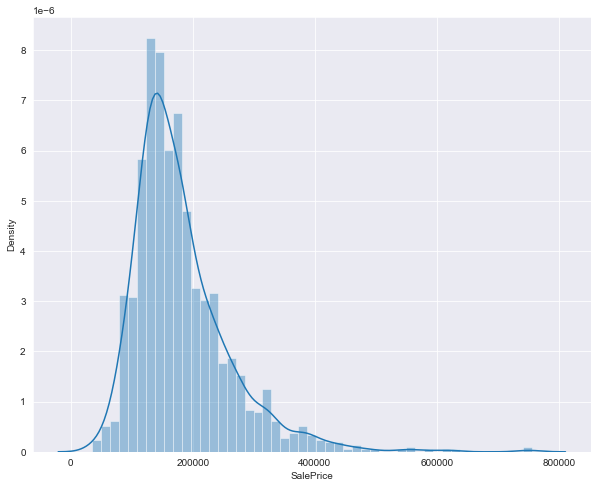

In [16]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

->  Skewed

In [19]:
df['SalePrice'] = np.log(df['SalePrice'])

C:\Users\saketh\AppData\Local\Temp\ipykernel_3132\2923820215.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice']);


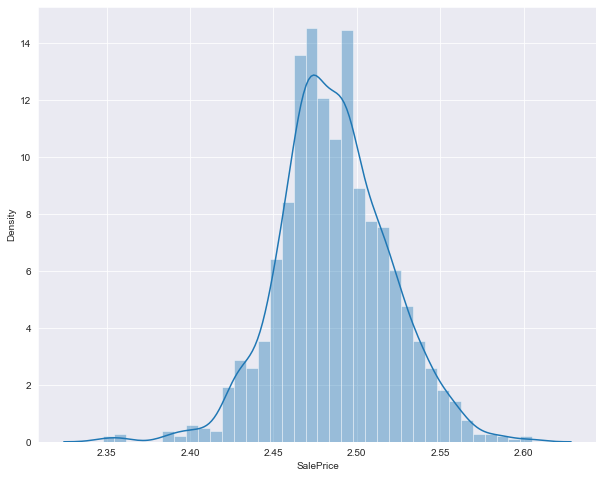

In [20]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

->unSkewed 

In [21]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008   2.505338  
1       5    2007   2.493950  
2       9    2008   2.510994  
3       2    2006   2.472277  
4      12    2008   2.520050

In [22]:
df['Age'] = abs(df['YearBuilt'] - df['YrSold'])

In [23]:
df= df.drop(columns=['YearBuilt','YrSold' ])

In [24]:
df_num_age  =  df.select_dtypes(include=['int64', 'float64'])

In [25]:
df_num_age

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0            65.0     8450          2003       196.0         706           0   
1            80.0     9600          1976         0.0         978           0   
2            68.0    11250          2002       162.0         486           0   
3            60.0     9550          1970         0.0         216           0   
4            84.0    14260          2000       350.0         655           0   
5            85.0    14115          1995         0.0         732           0   
6            75.0    10084          2005       186.0        1369           0   
7             NaN    10382          1973       240.0         859          32   
8            51.0     6120          1950         0.0           0           0   
9            50.0     7420          1950         0.0         851           0   
10           70.0    11200          1965         0.0         906           0   
11           85.0    11924          2006       286.0         998           0   
12            NaN    12968          1962         0.0         737           0   
13           91.0    10652          2007       306.0           0           0   
14            NaN    10920          1960       212.0         733           0   
15           51.0     6120          2001         0.0           0           0   
16            NaN    11241          1970       180.0         578           0   
17           72.0    10791          1967         0.0           0           0   
18           66.0    13695          2004         0.0         646           0   
19           70.0     7560          1965         0.0         504           0   
20          101.0    14215          2006       380.0           0           0   
21           57.0     7449          1950         0.0           0           0   
22           75.0     9742          2002       281.0           0           0   
23           44.0     4224          1976         0.0         840           0   
24            NaN     8246          2001         0.0         188         668   
25          110.0    14230          2007       640.0           0           0   
26           60.0     7200          2000         0.0         234         486   
27           98.0    11478          2008       200.0        1218           0   
28           47.0    16321          1997         0.0        1277           0   
29           60.0     6324          1950         0.0           0           0   
30           50.0     8500          1950         0.0           0           0   
31            NaN     8544          2006         0.0           0           0   
32           85.0    11049          2007         0.0           0           0   
33           70.0    10552          1959         0.0        1018           0   
34           60.0     7313          2005       246.0        1153           0   
35          108.0    13418          2005       132.0           0           0   
36          112.0    10859          1995         0.0           0           0   
37           74.0     8532          1990       650.0        1213           0   
38           68.0     7922          2007         0.0         731           0   
39           65.0     6040          1955         0.0           0           0   
40           84.0     8658          1965       101.0         643           0   
41          115.0    16905          1959         0.0         967           0   
42            NaN     9180          1983         0.0         747          93   
43            NaN     9200          1980         0.0         280         491   
44           70.0     7945          1959         0.0         179         506   
45           61.0     7658          2005       412.0         456           0   
46           48.0    12822          2003         0.0        1351           0   
47           84.0    11096          2006         0.0          24           0   
48           33.0     4456          2008         0.0           0           0   
49    

In [26]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [27]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

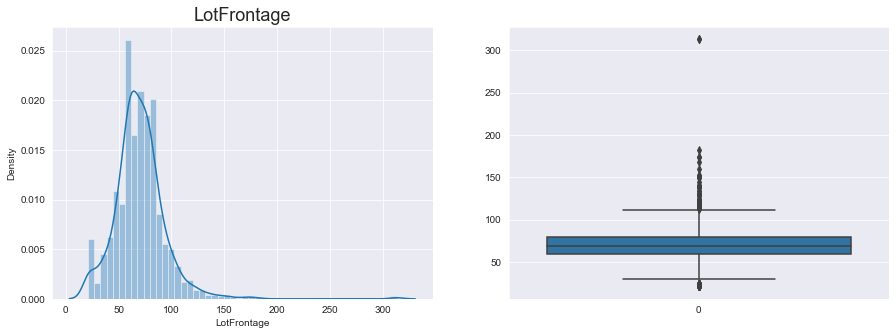

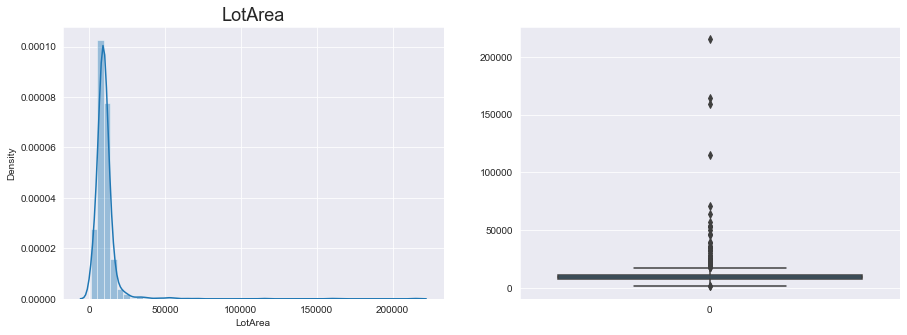

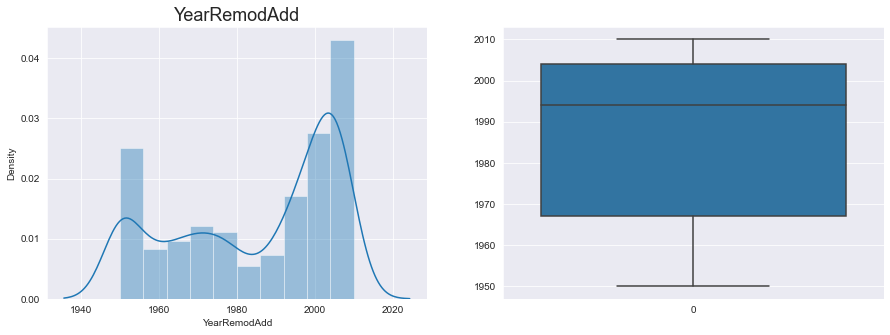

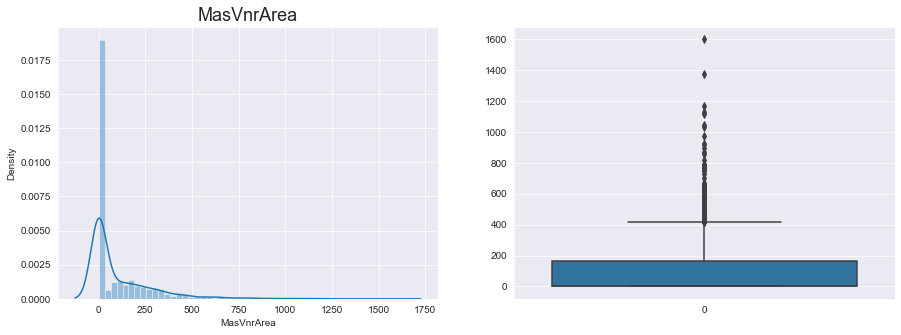

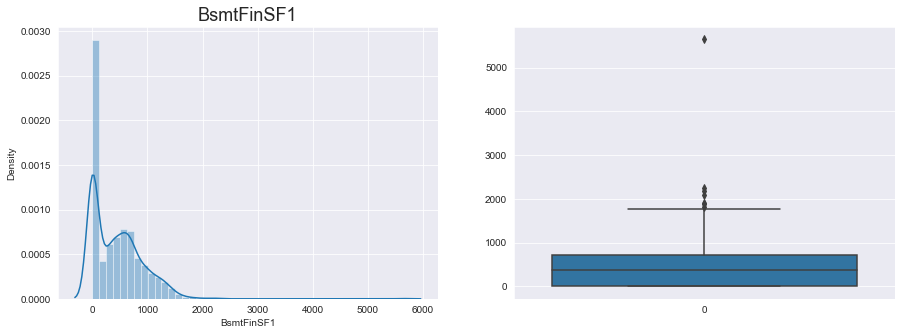

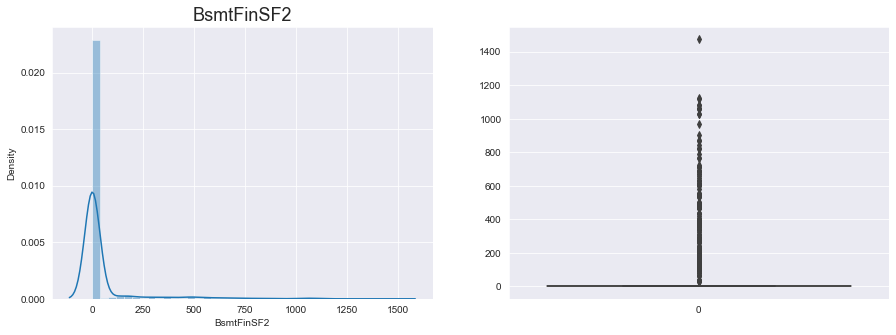

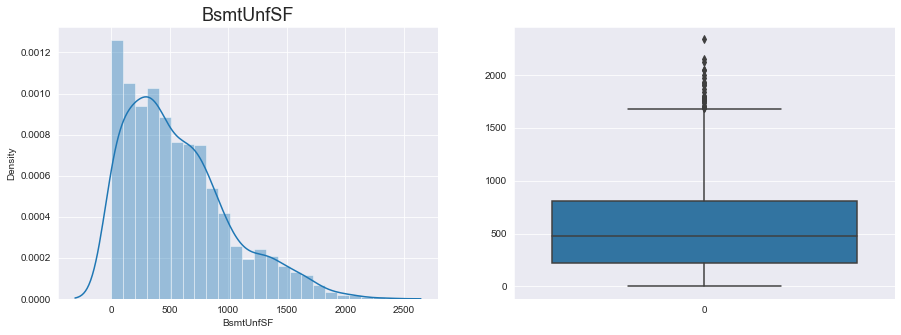

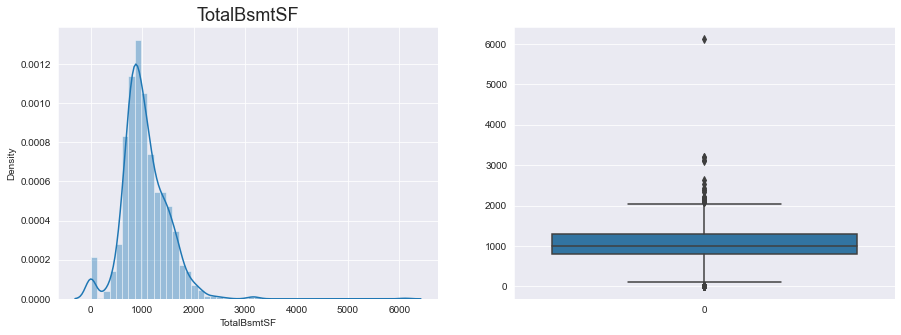

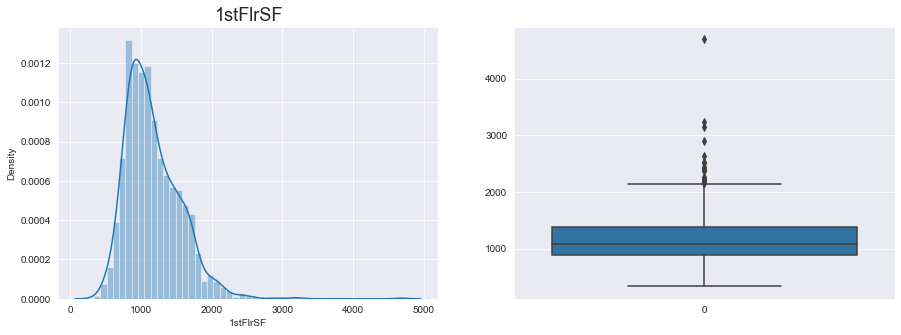

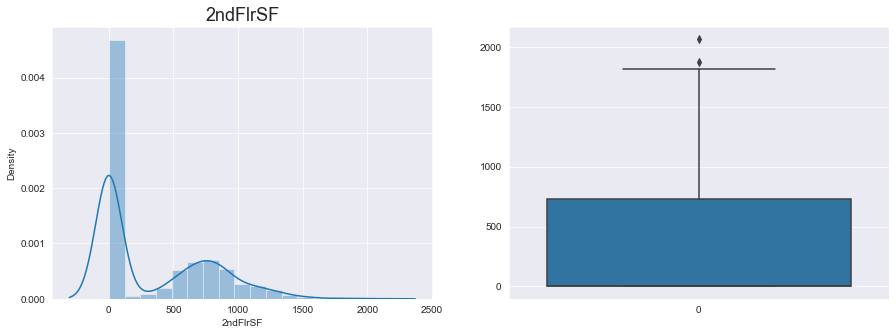

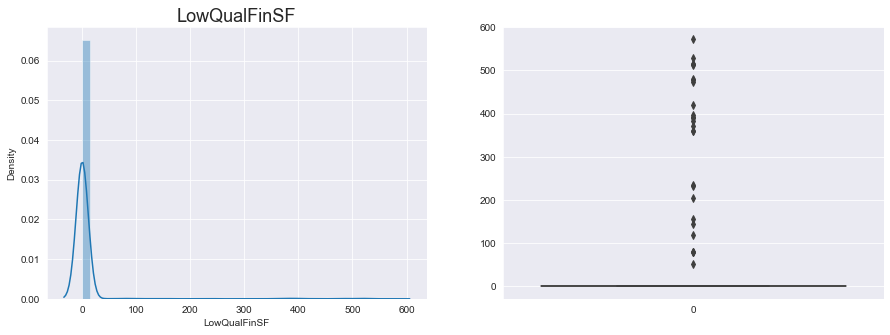

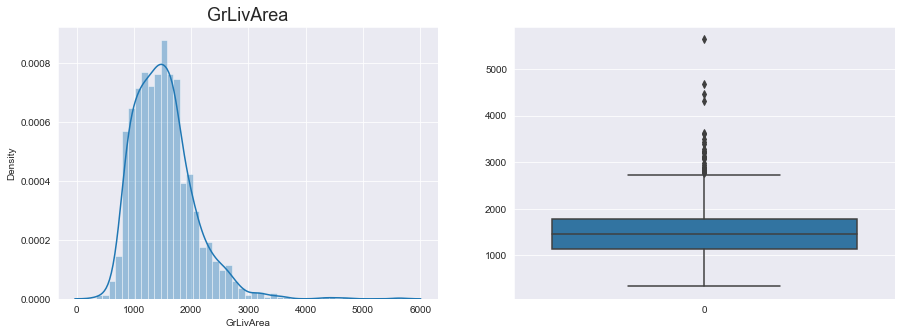

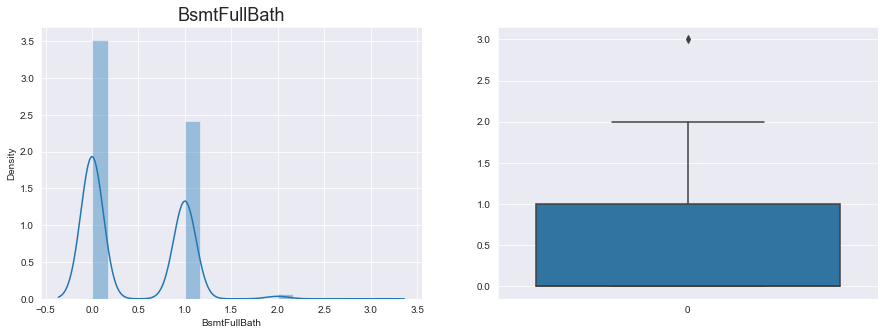

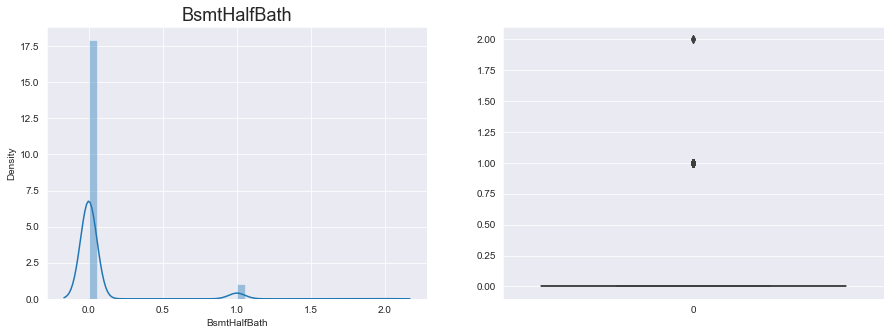

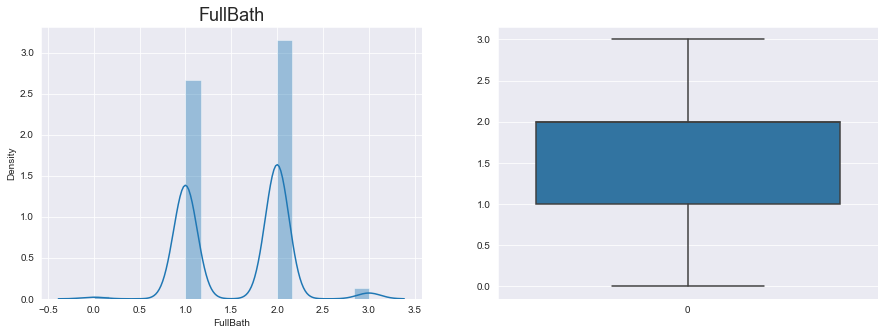

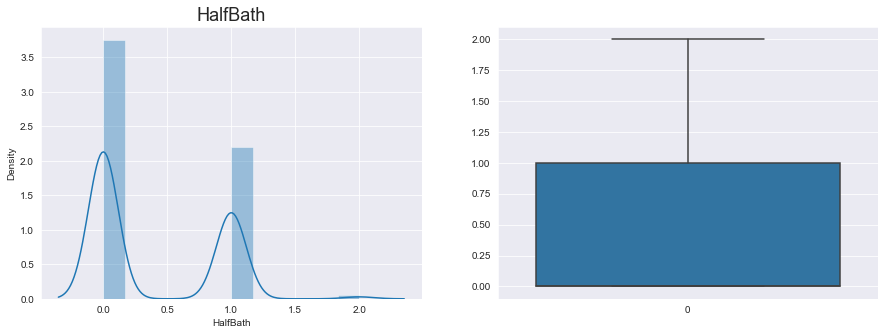

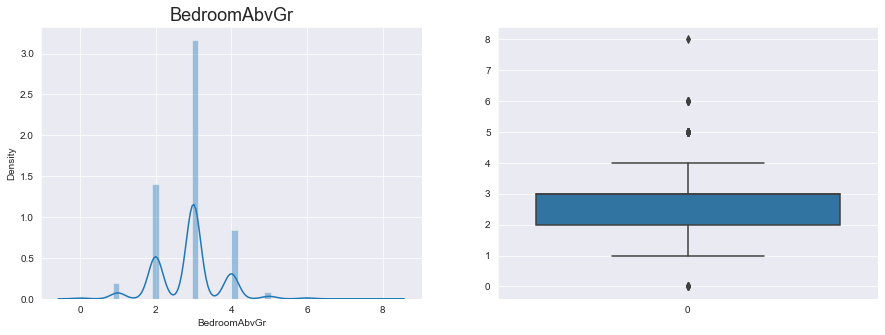

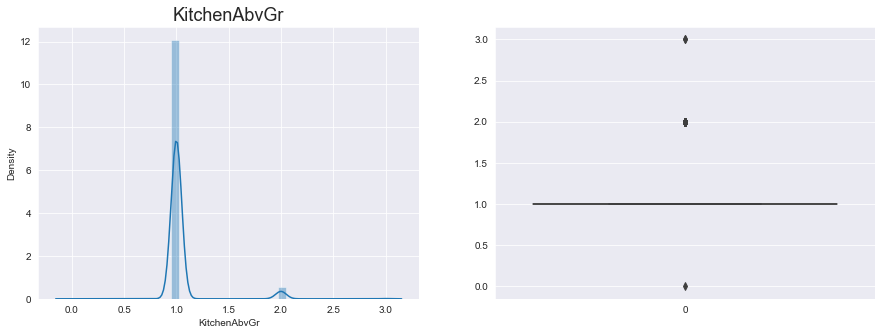

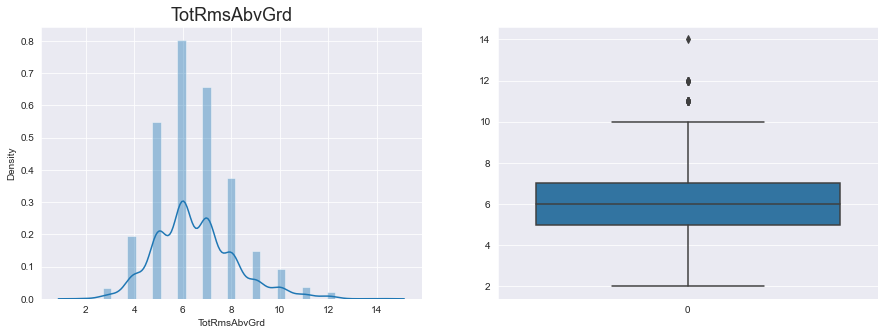

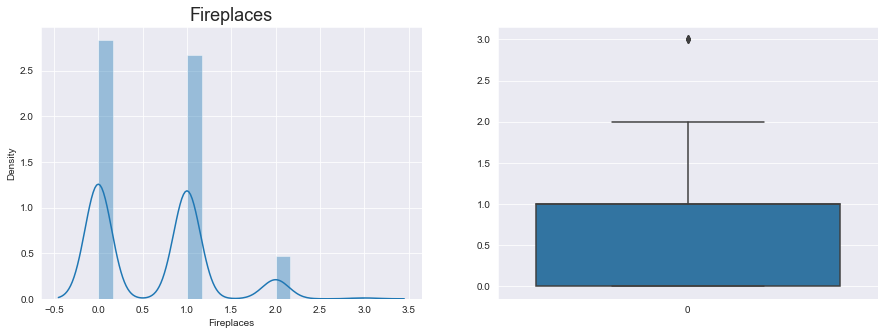

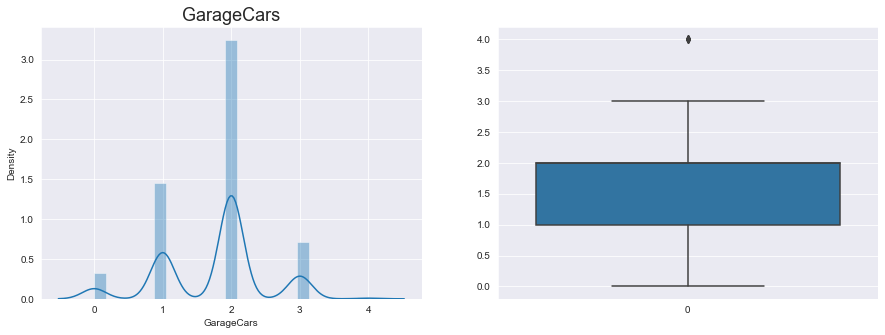

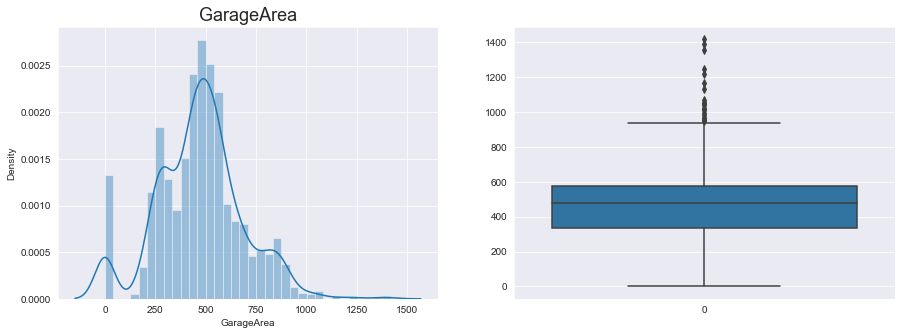

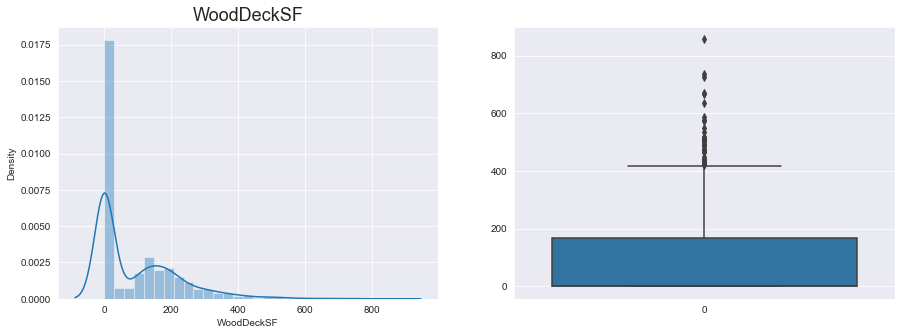

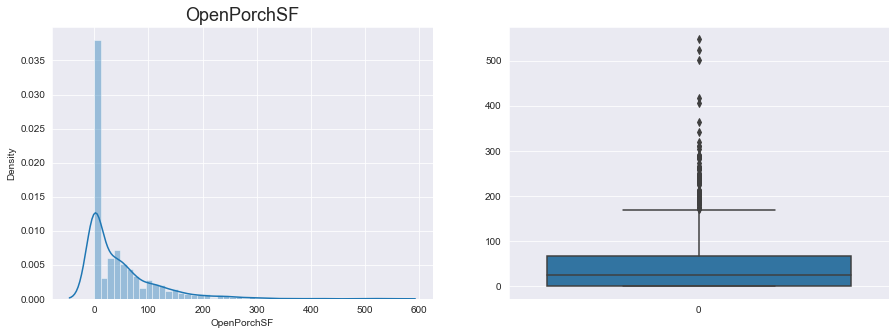

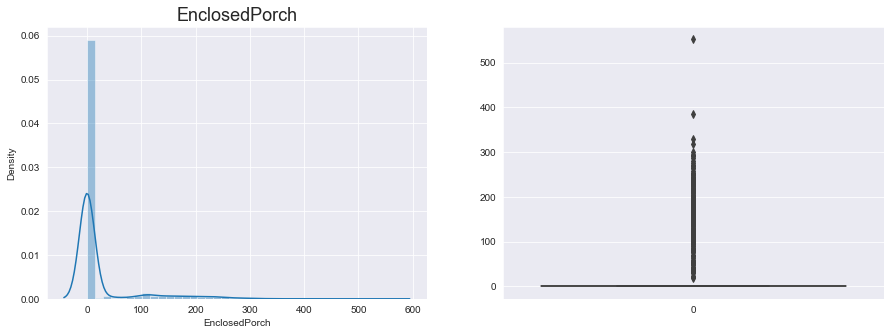

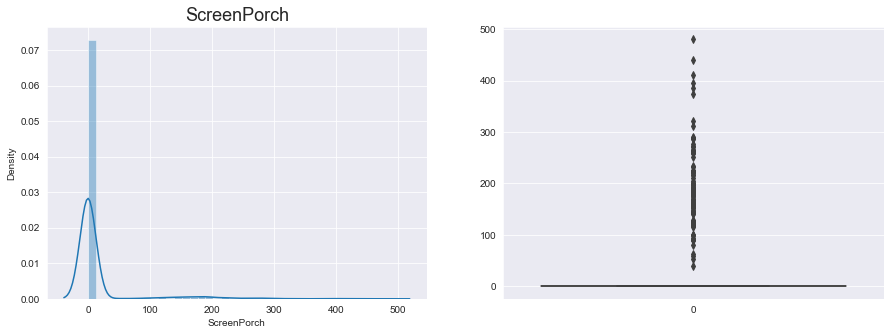

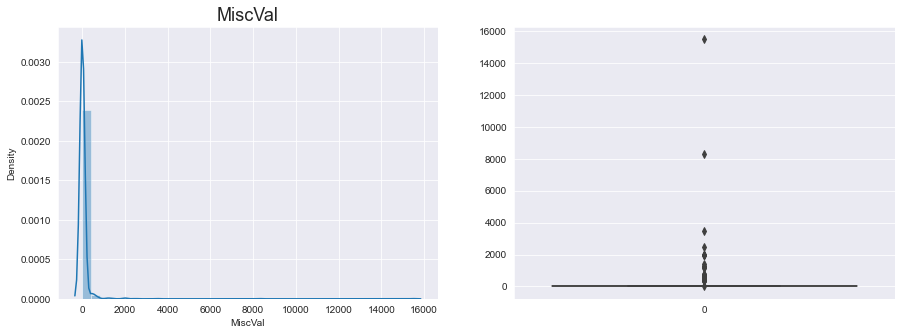

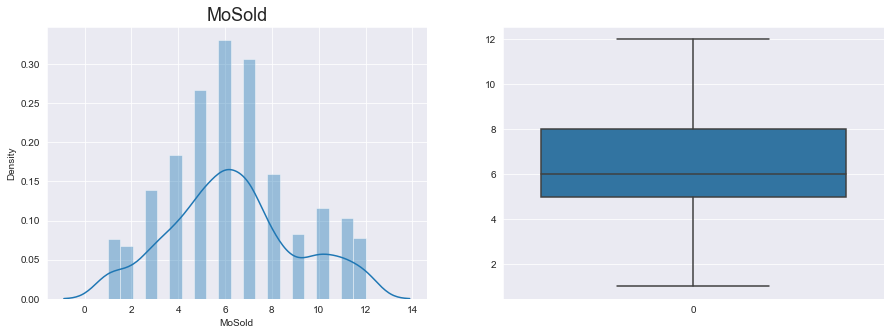

KeyError: 'Age'

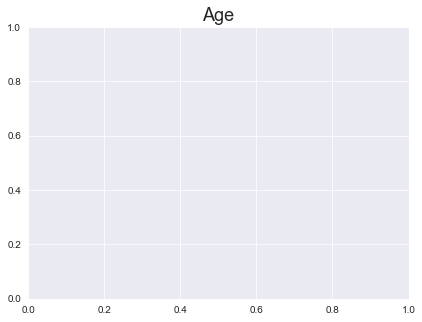

In [28]:
for col in df_num_age.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()    

In [30]:
df_num_age['Age']  = abs(df1['YearBuilt'] - df1['YrSold'])

KeyError: 5

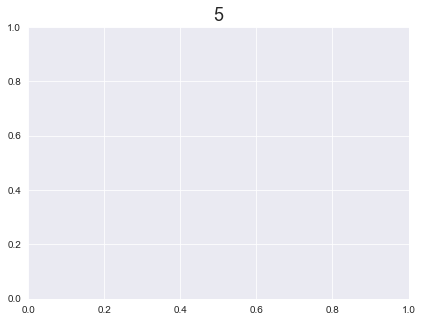

In [31]:
for col in df_num_age.Age:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()    
    


In [32]:
type(df_num_age['LotArea'])

pandas.core.series.Series

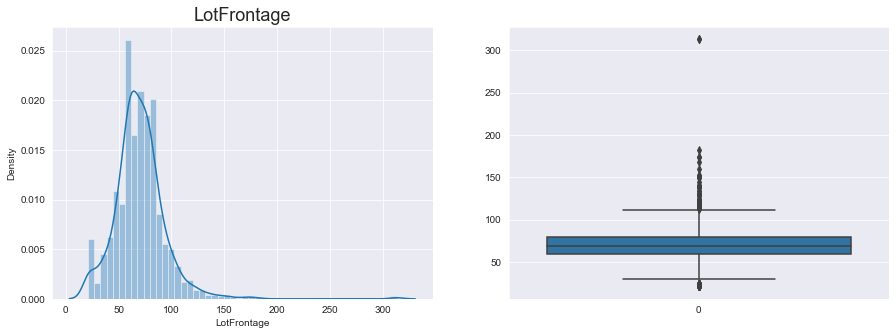

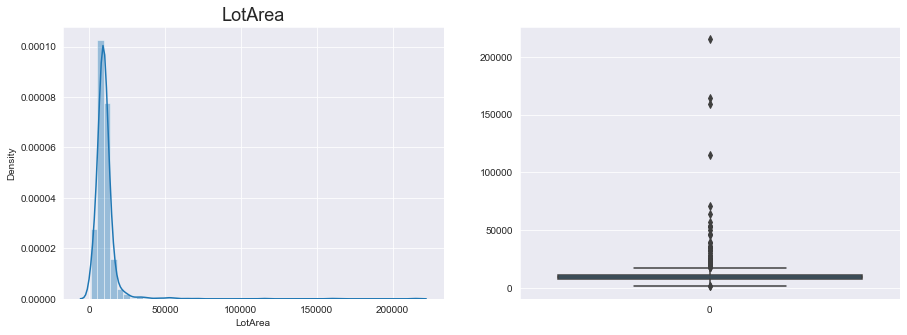

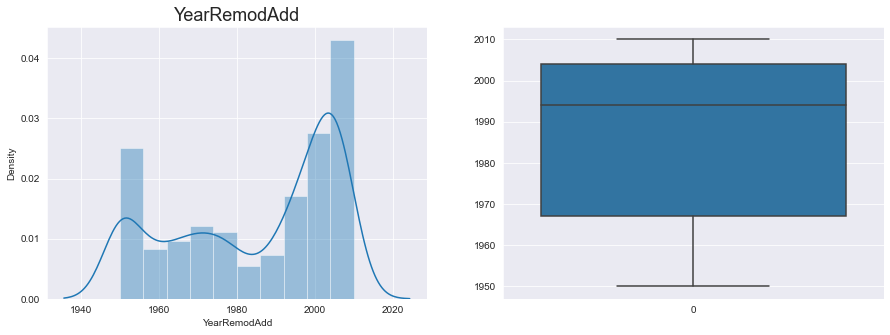

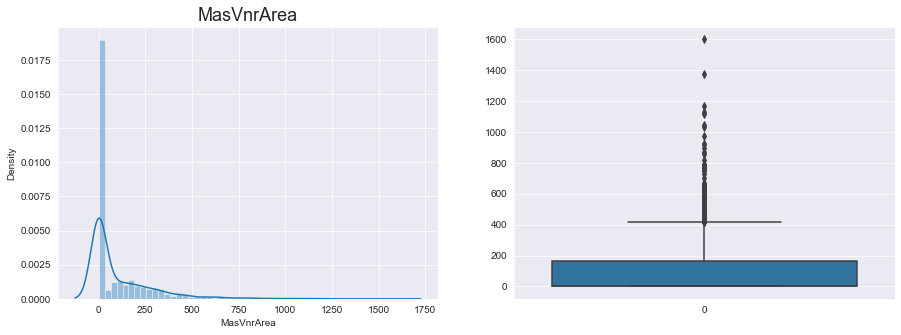

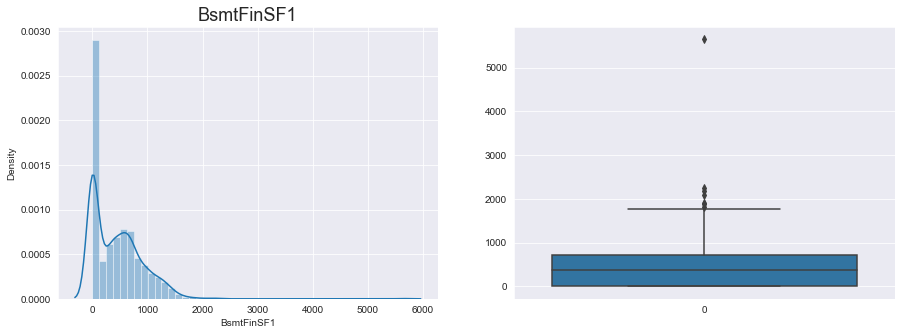

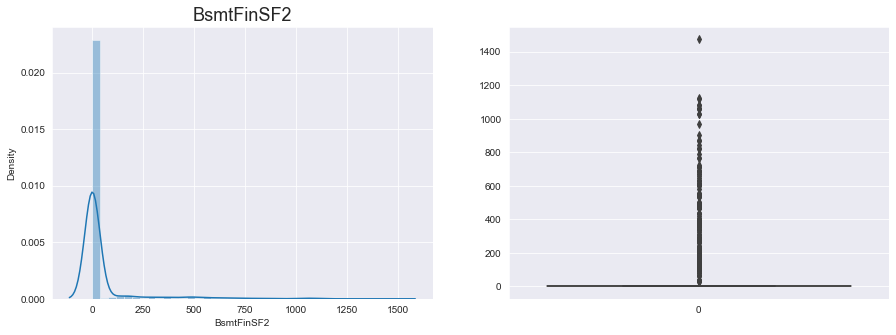

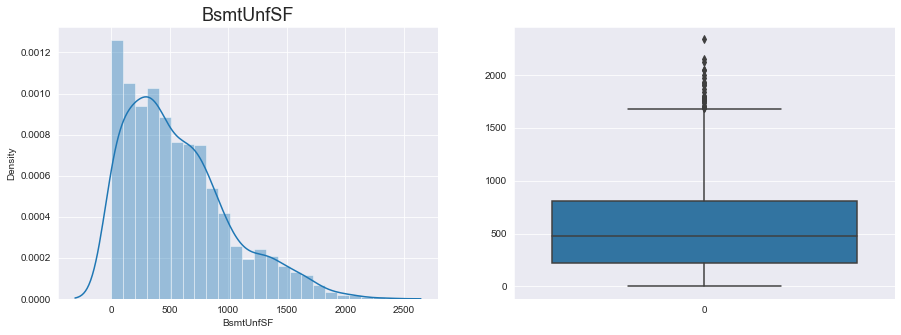

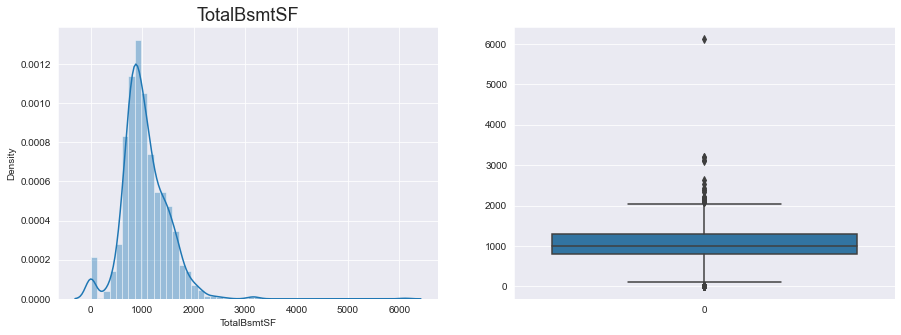

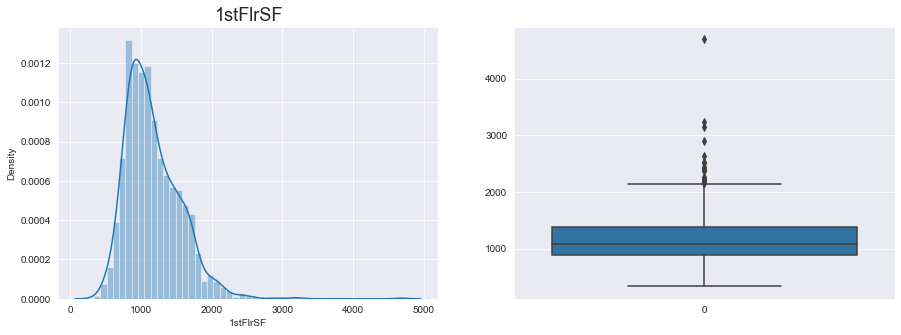

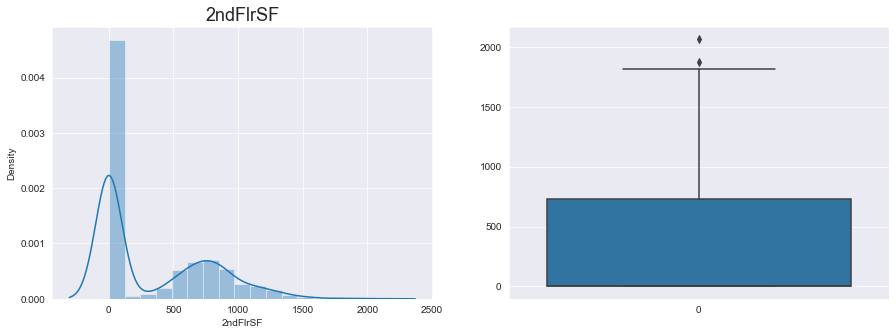

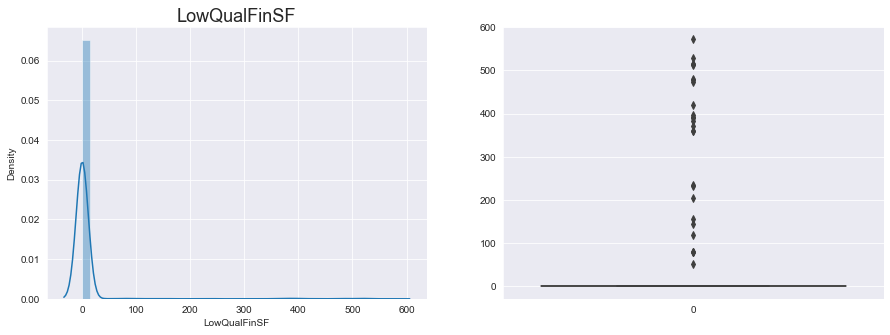

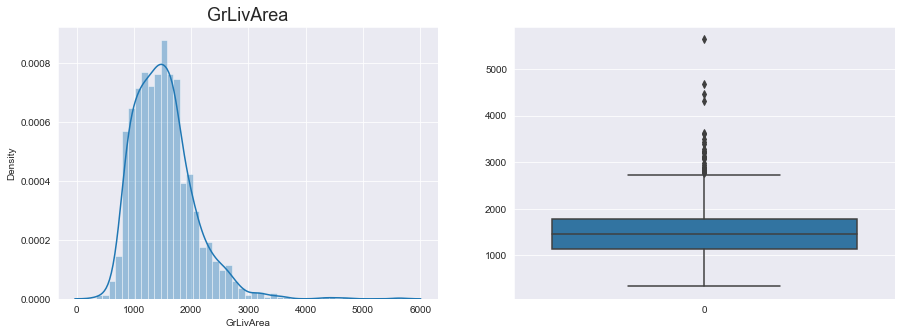

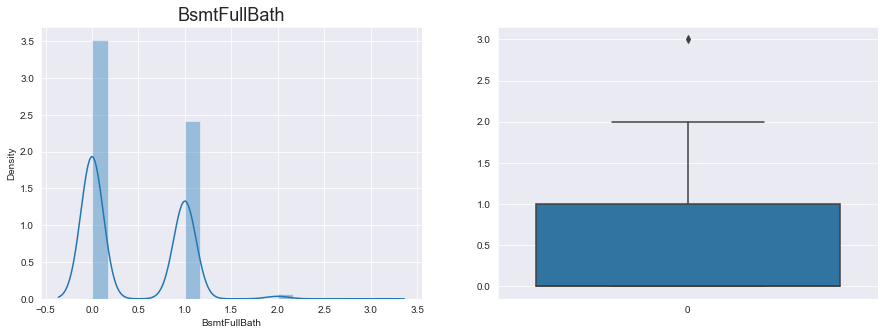

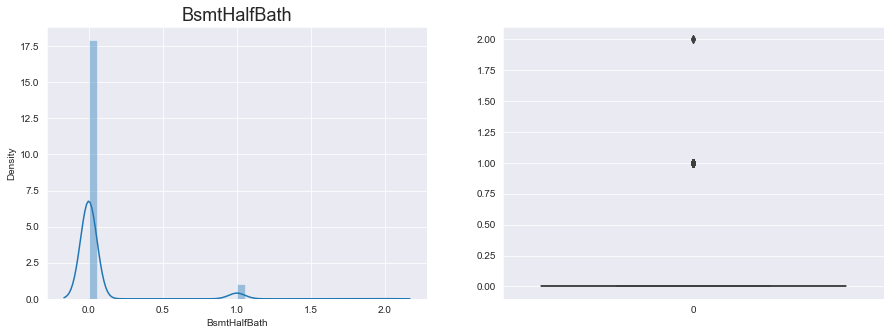

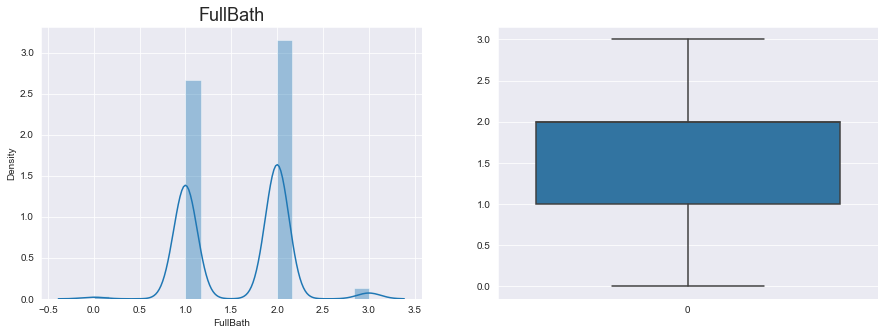

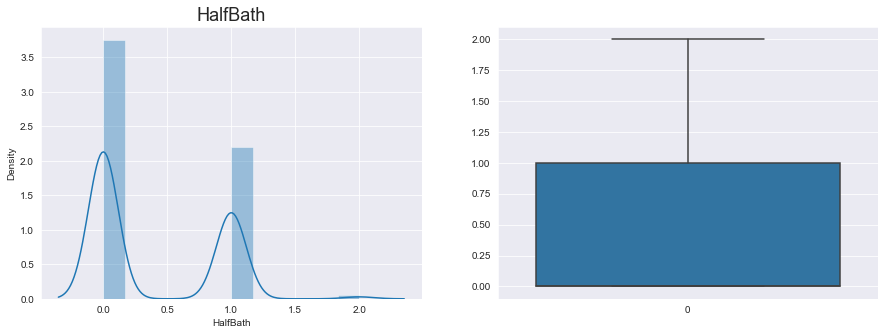

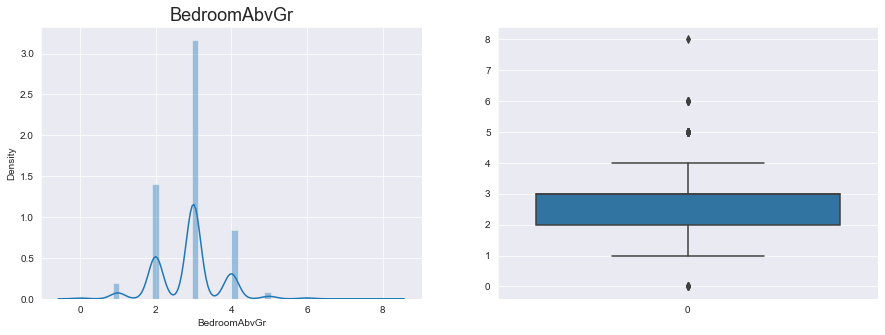

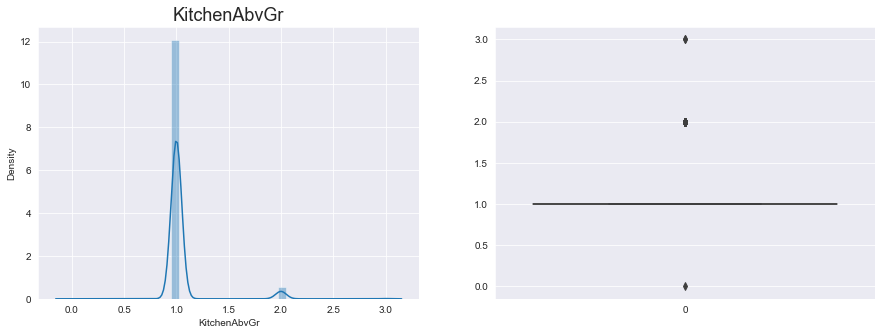

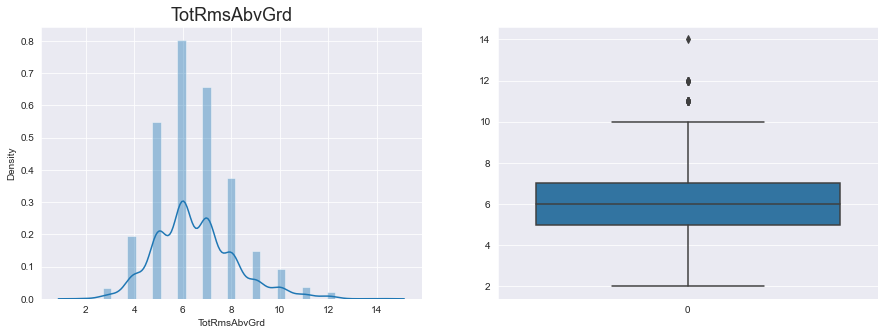

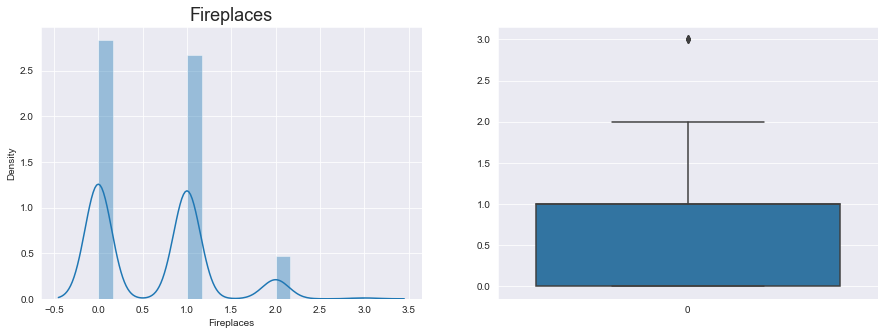

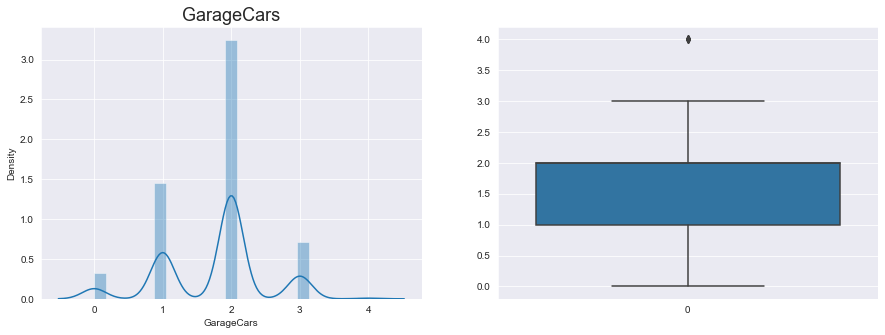

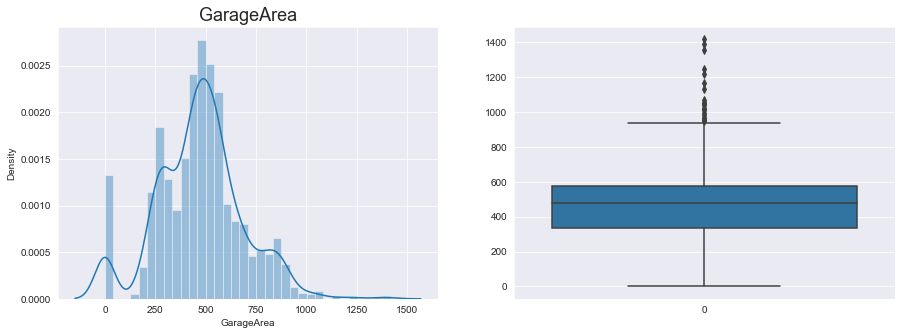

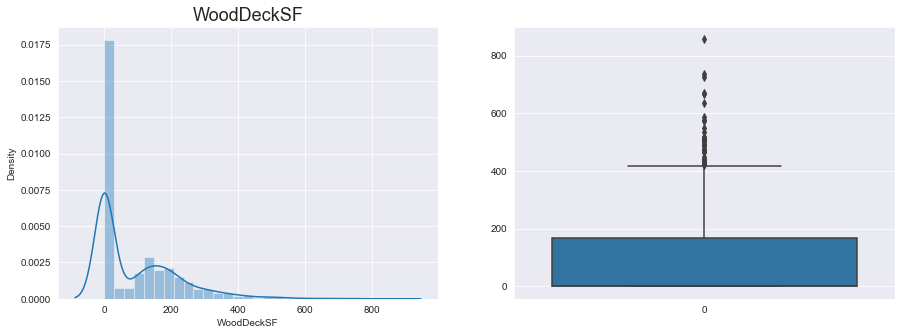

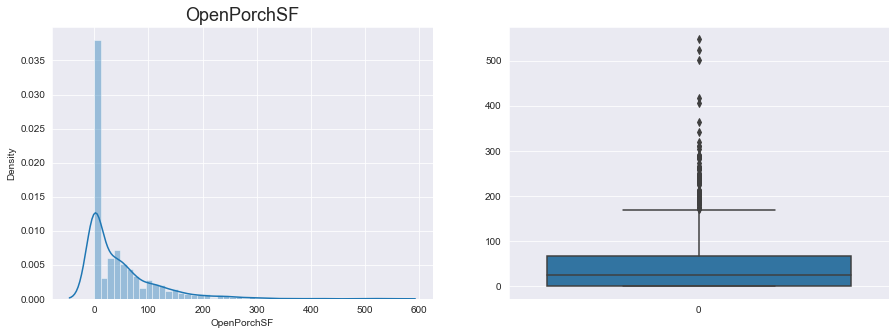

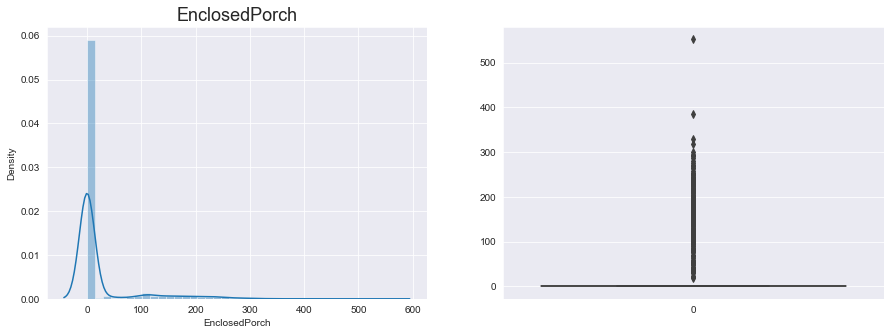

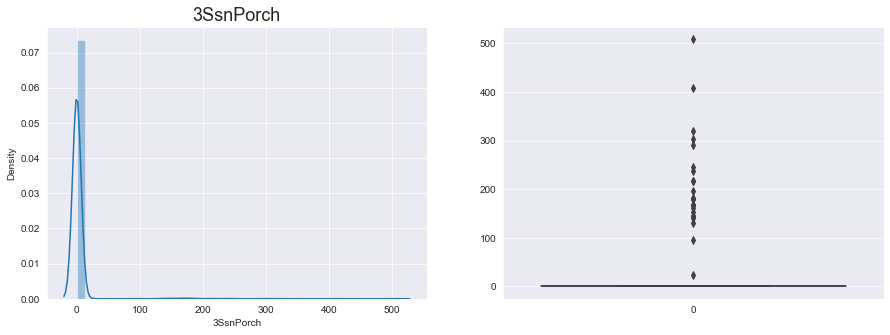

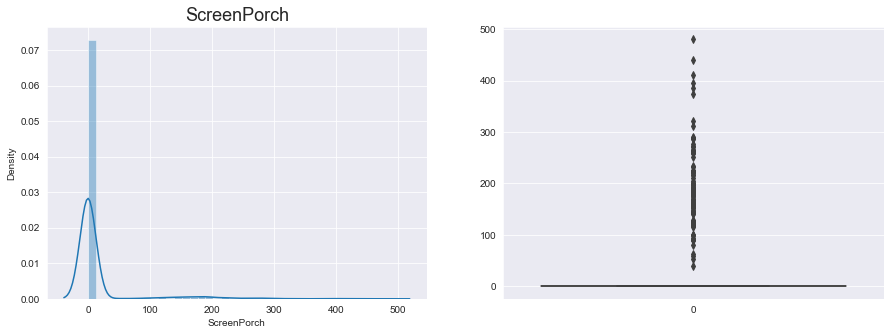

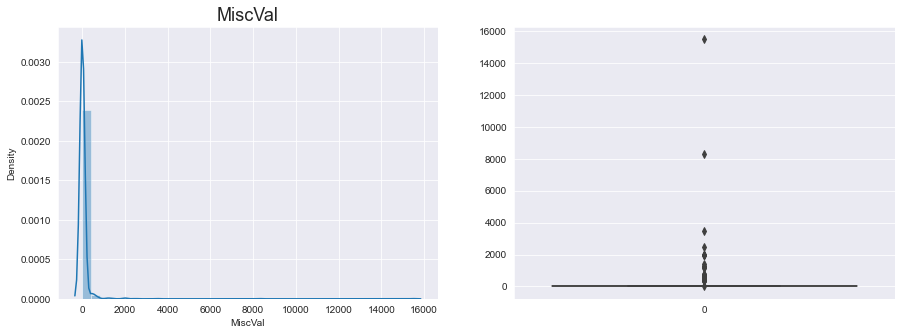

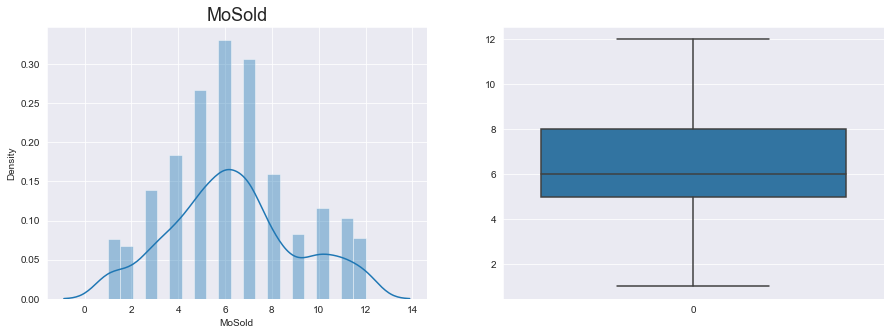

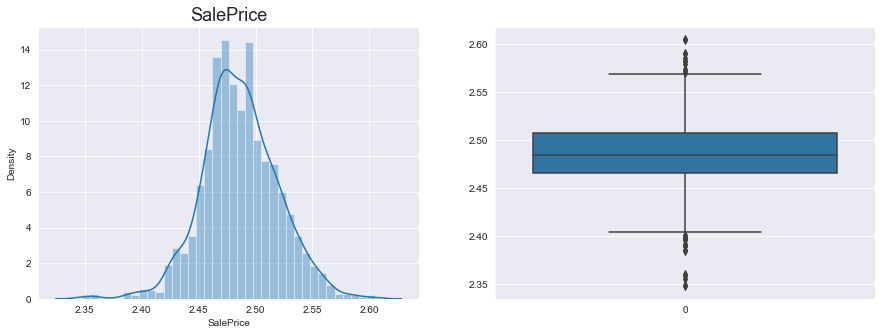

In [33]:
# df_num_age is DataFrame
for col in df_num_age.columns:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num_age[col])

    plt.subplot(1, 2, 2)
    sns.boxplot(df_num_age[col])
    
    plt.show()


In [34]:
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

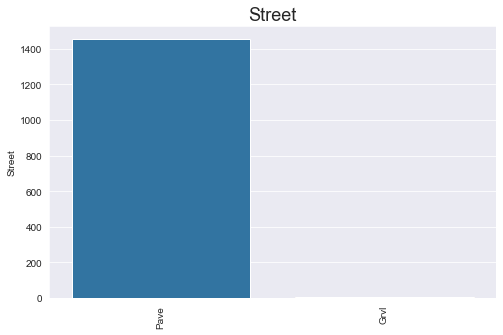

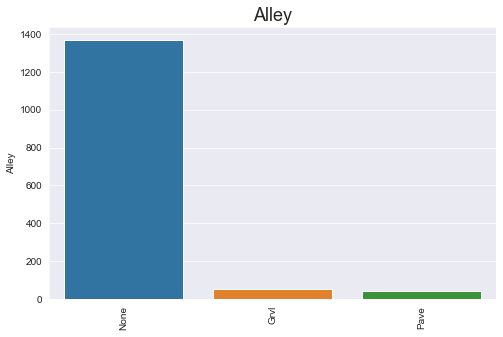

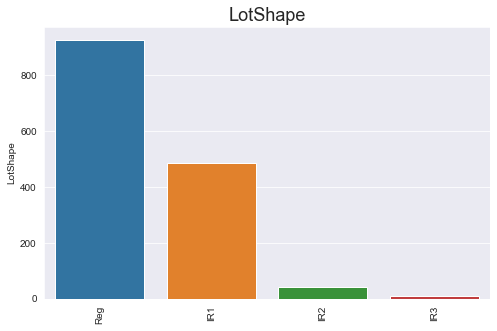

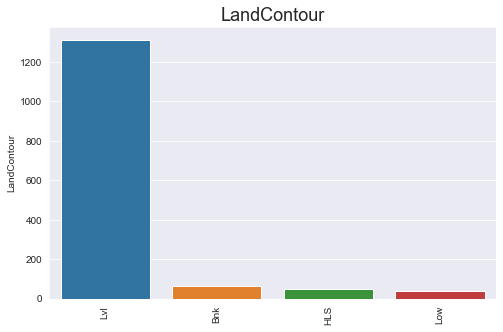

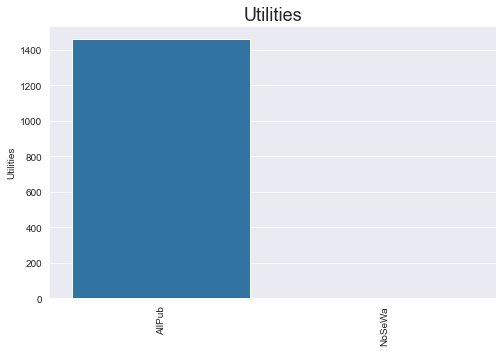

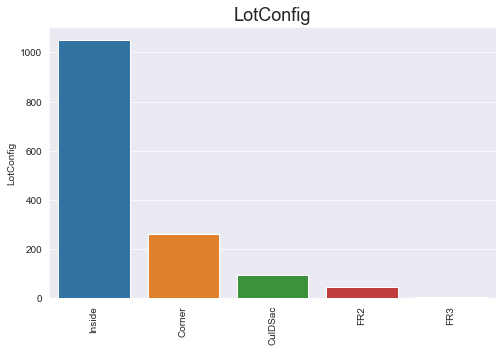

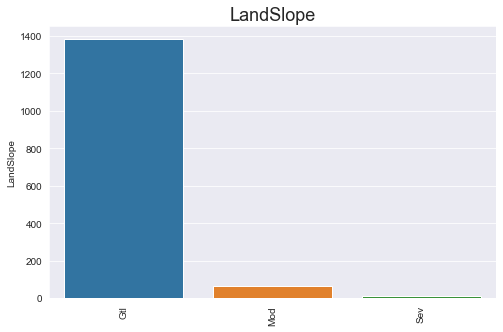

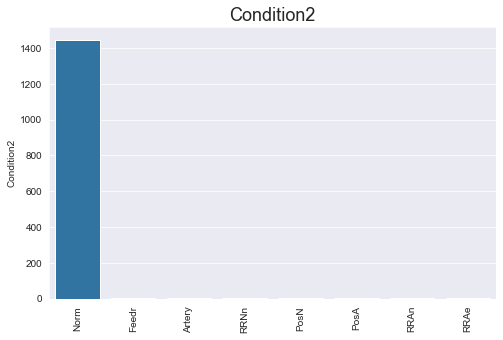

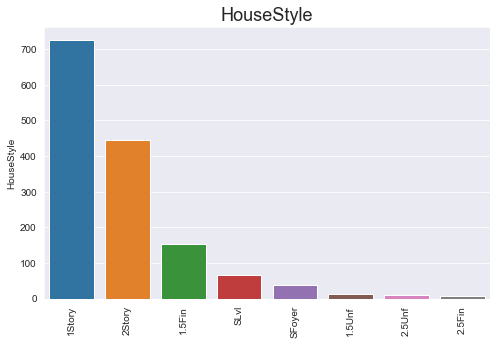

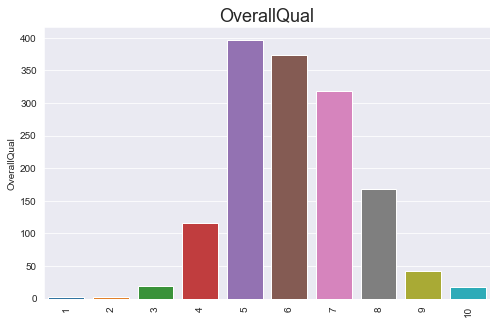

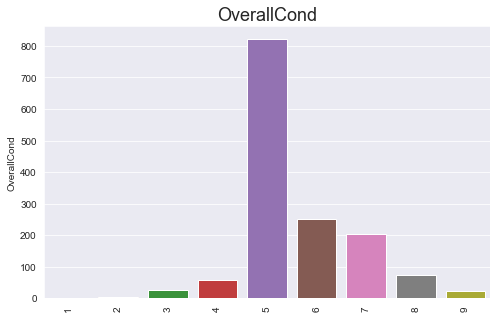

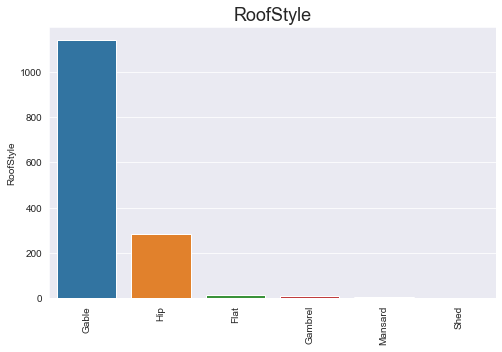

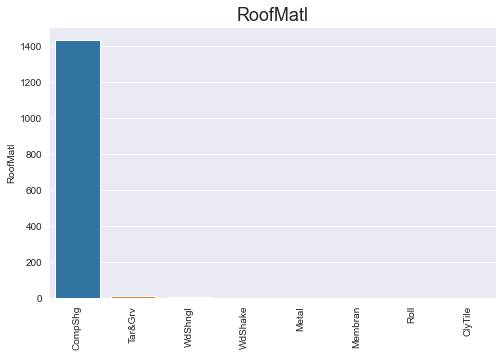

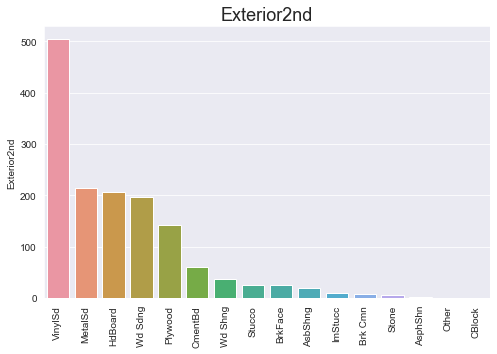

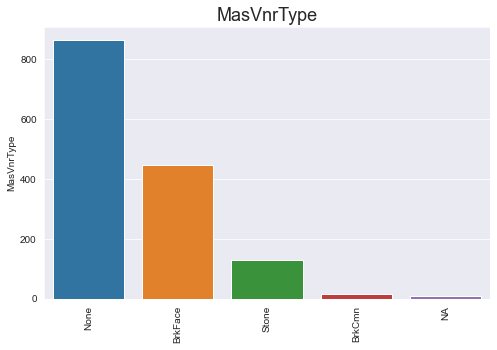

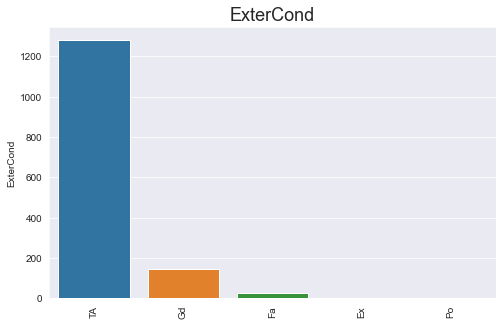

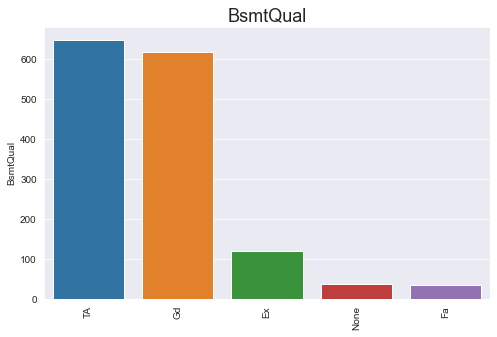

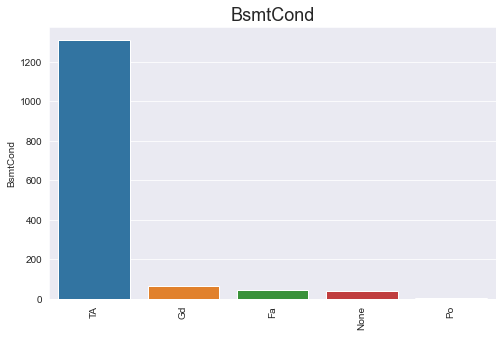

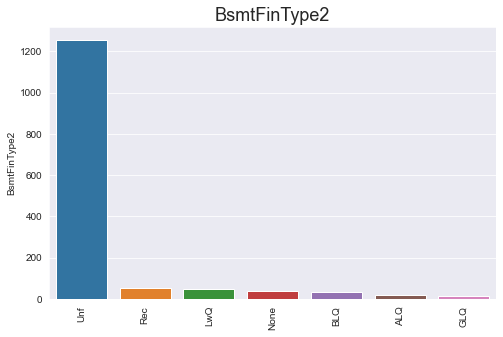

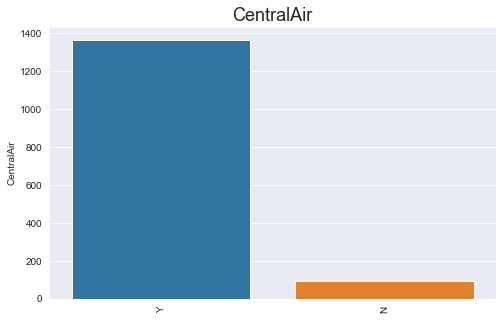

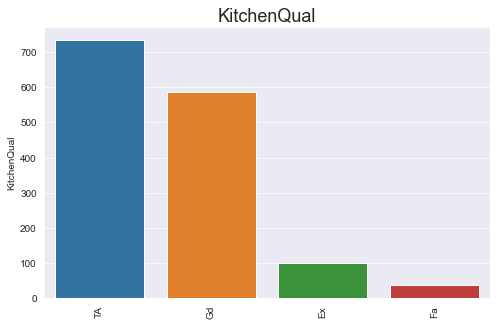

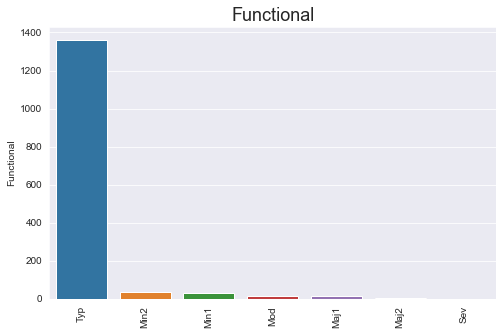

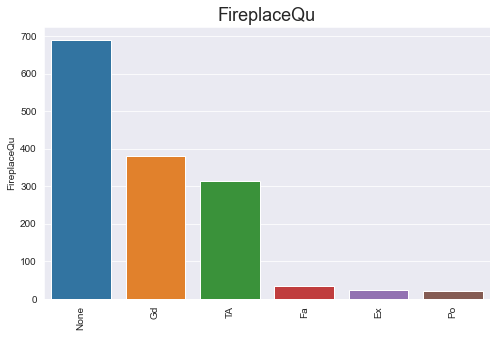

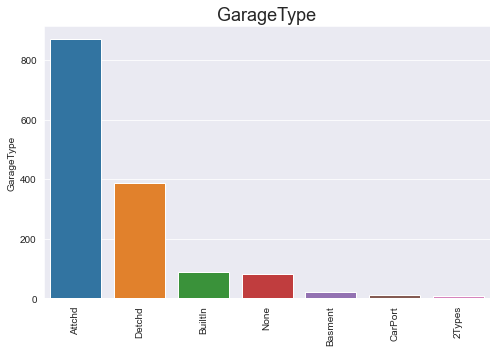

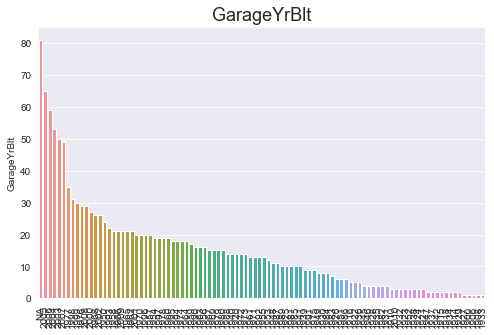

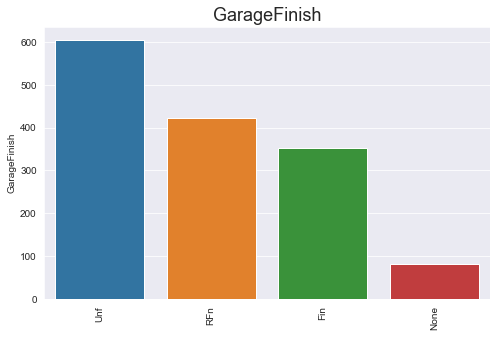

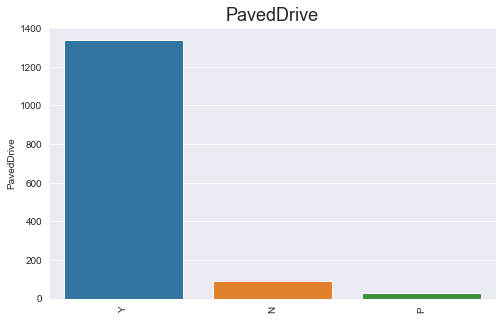

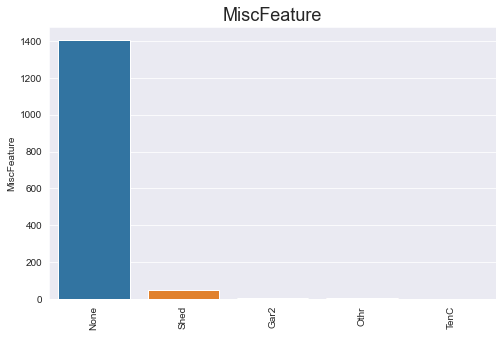

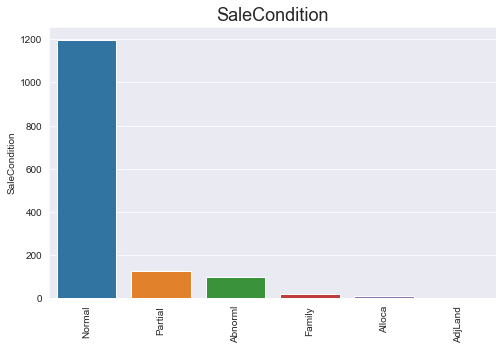

In [35]:
for col in df_cat.columns:
    plt.figure(figsize=(8, 5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.show()


In [36]:
for feature in df_cat:
    data=df_cat.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

KeyError: 'Column not found: SalePrice'

In [37]:
df_cat_Sale = df_cat 

In [38]:
df_cat_Sale['SalePrice'] = df1['SalePrice']

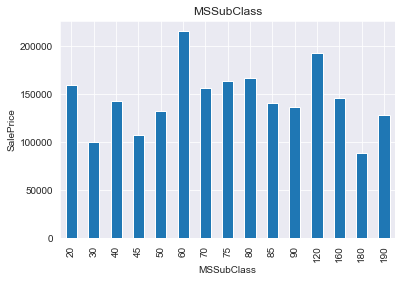

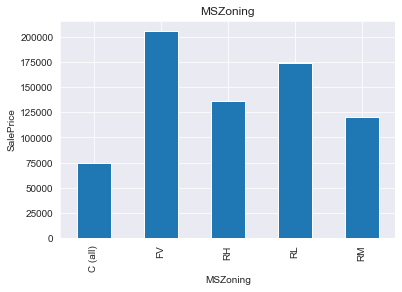

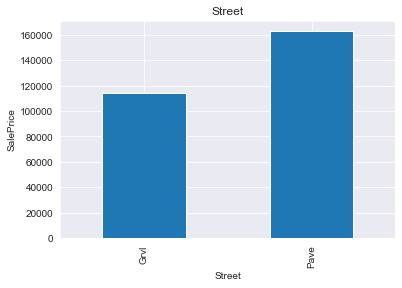

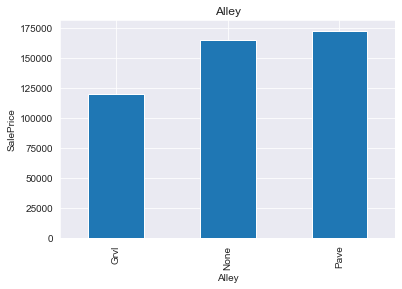

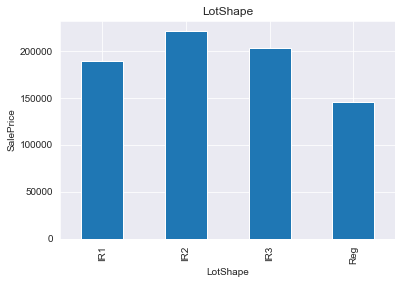

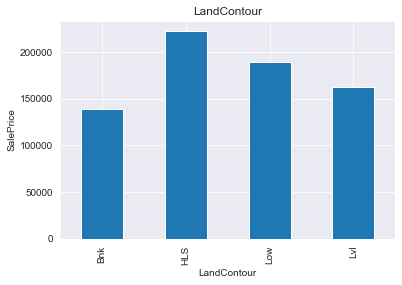

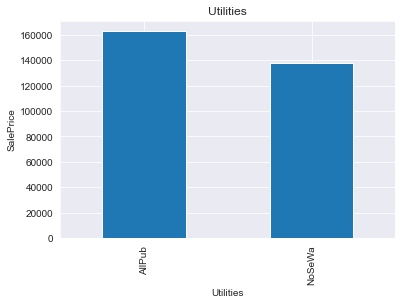

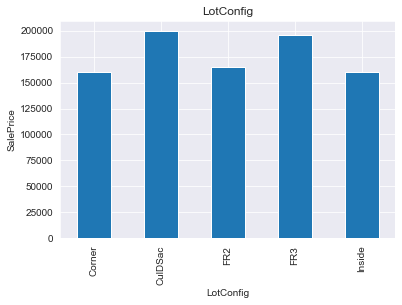

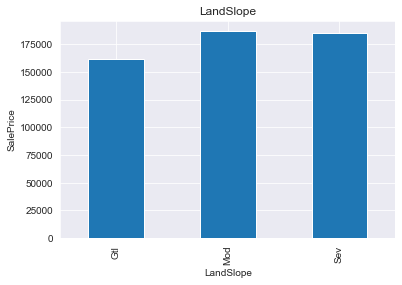

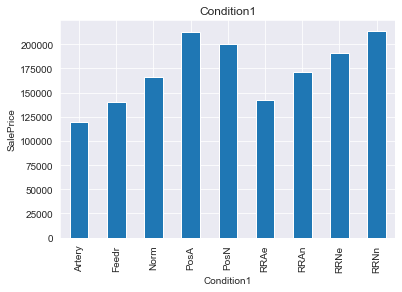

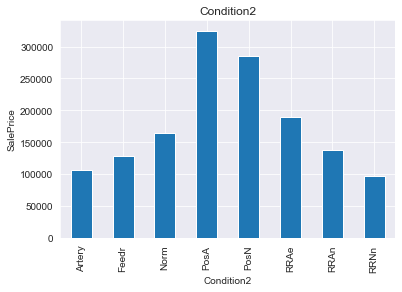

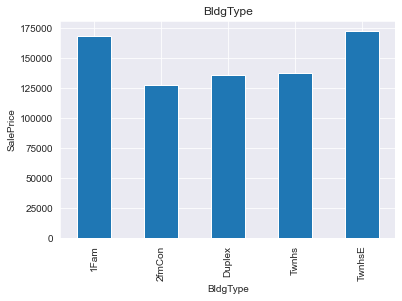

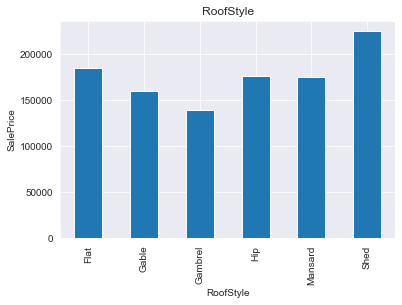

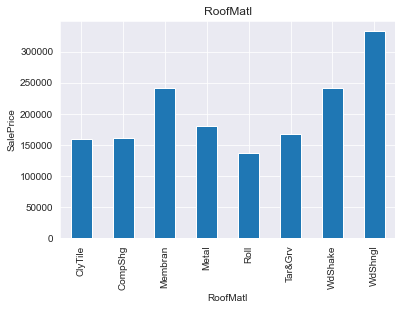

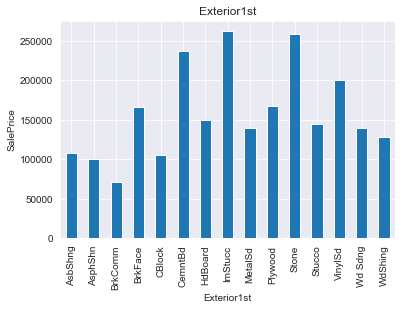

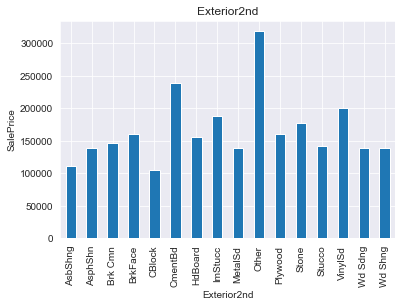

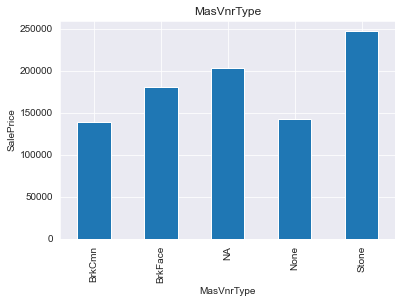

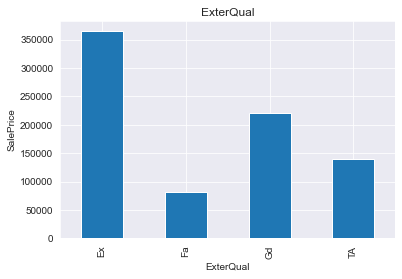

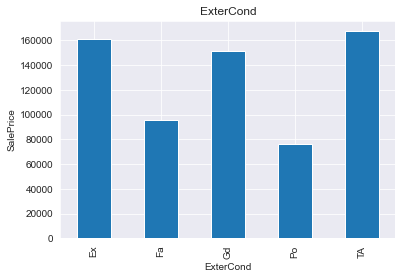

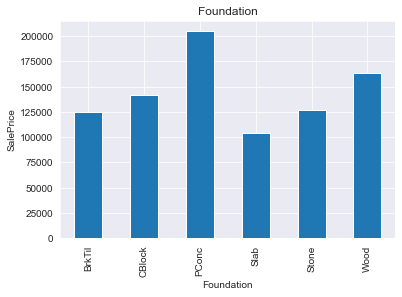

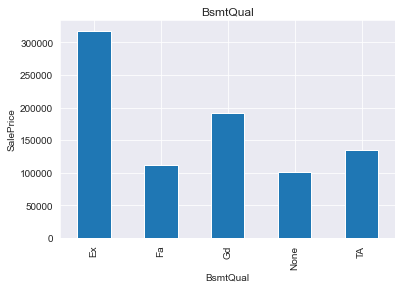

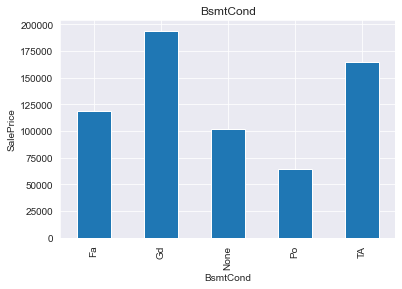

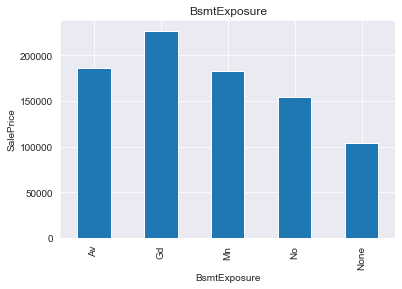

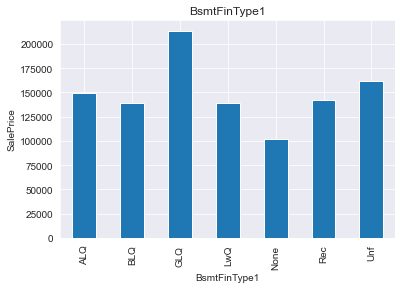

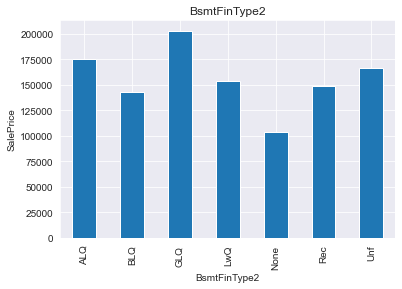

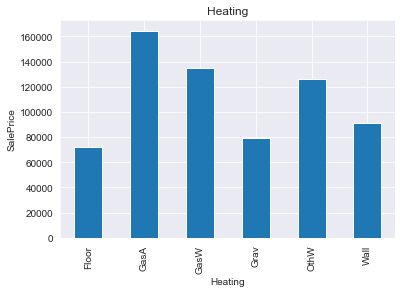

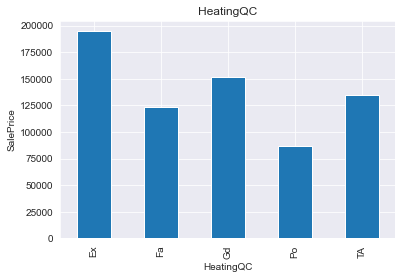

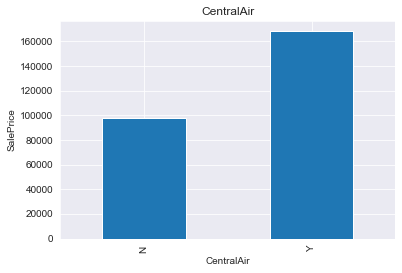

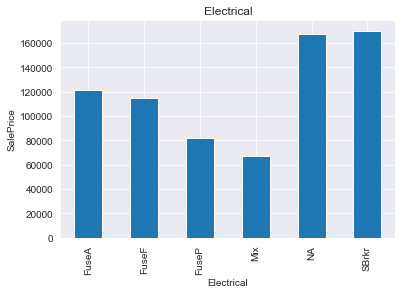

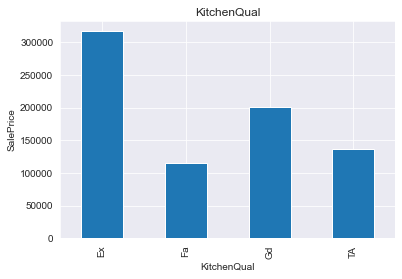

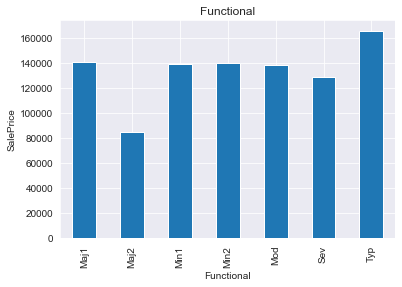

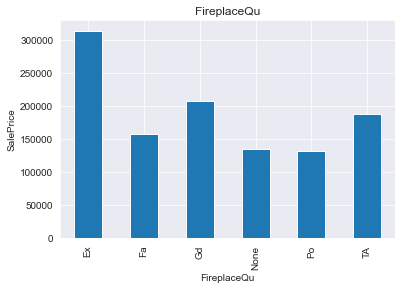

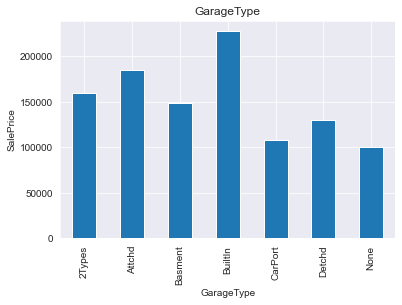

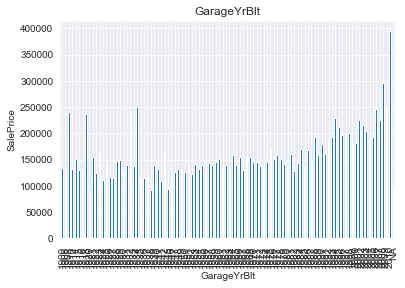

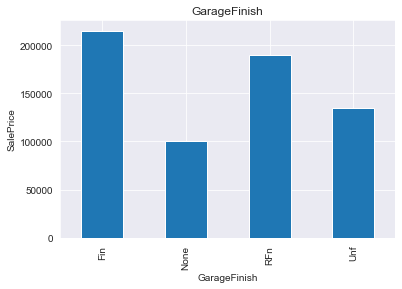

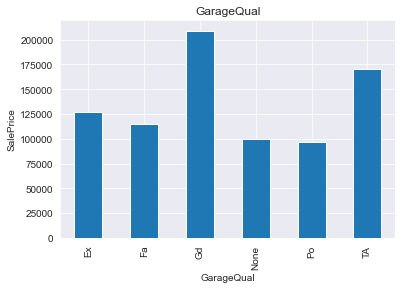

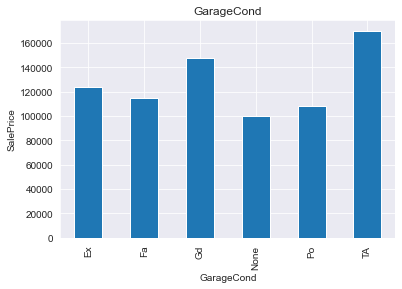

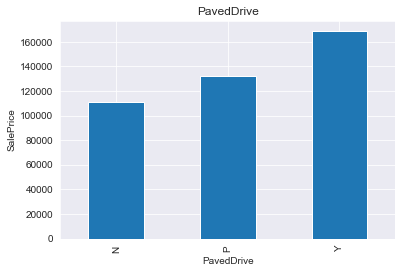

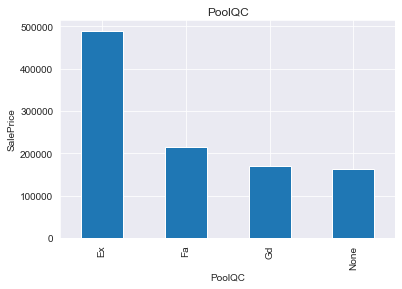

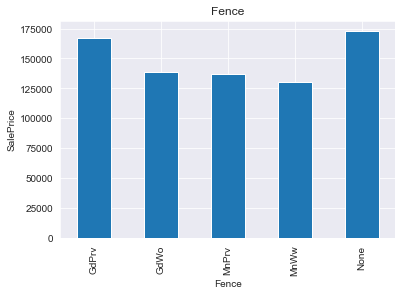

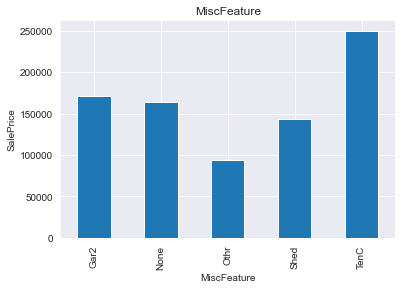

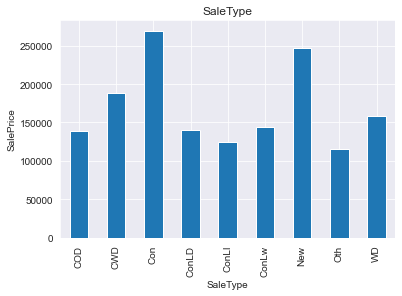

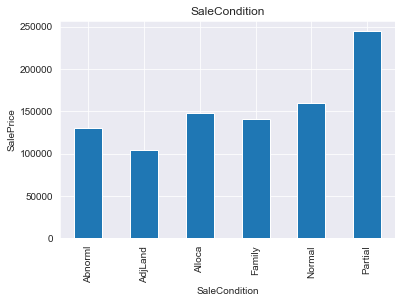

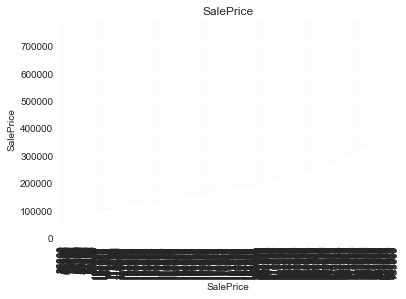

In [39]:
for feature in df_cat:
    data=df_cat.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [115]:
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

In [40]:
df_cat.shape

(1460, 48)

In [41]:
df_num_age.shape

(1460, 32)

#### target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.¶

In [42]:
df.shape


(1460, 79)

In [43]:
df.isnull().sum() 

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

> two columns with missing values

In [120]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [121]:
df.shape

(1460, 79)

In [122]:
df_num['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
31        NaN
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42        NaN
43        NaN
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50        NaN
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
68       47.0
69       81.0
70       95.0
71    

In [123]:
df_num = df.select_dtypes(include=['int64','float64'])

In [124]:
df_cat = df.select_dtypes(include='object')

In [125]:
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
# df_cat_encoded.head()

In [126]:
df_cat_encoded.shape,df_cat.shape

((1460, 353), (1460, 47))

> 47 to 353
> so 32+353 = 385

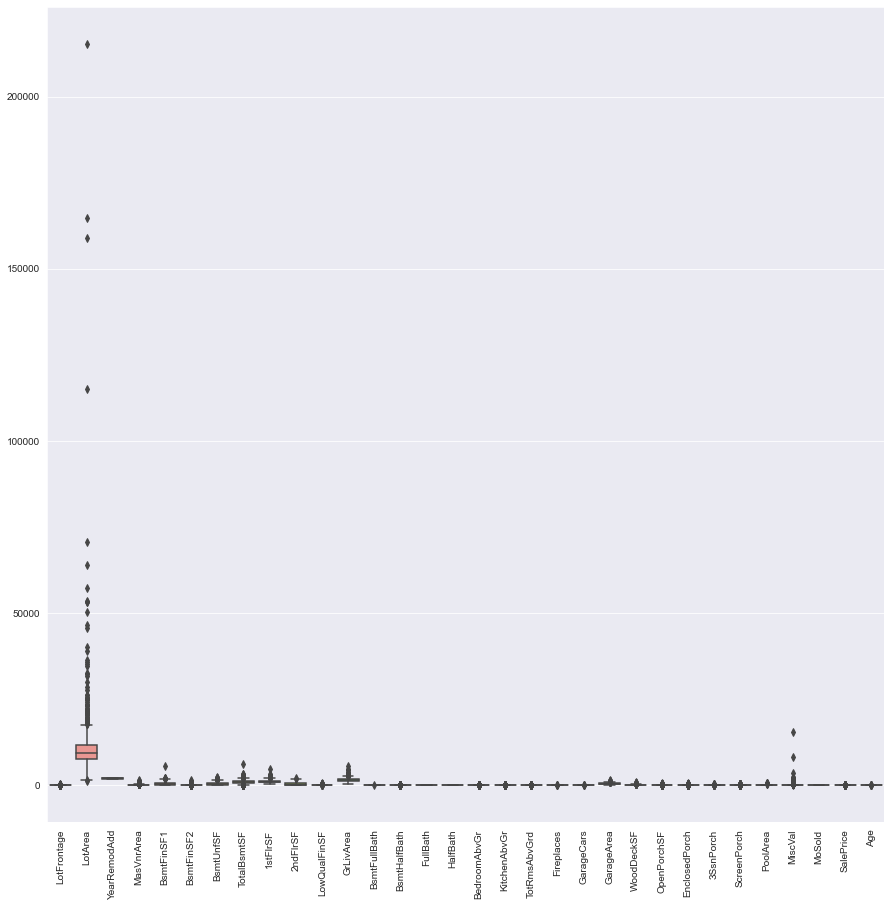

In [127]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);


### >Capping Outliers

In [129]:
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)


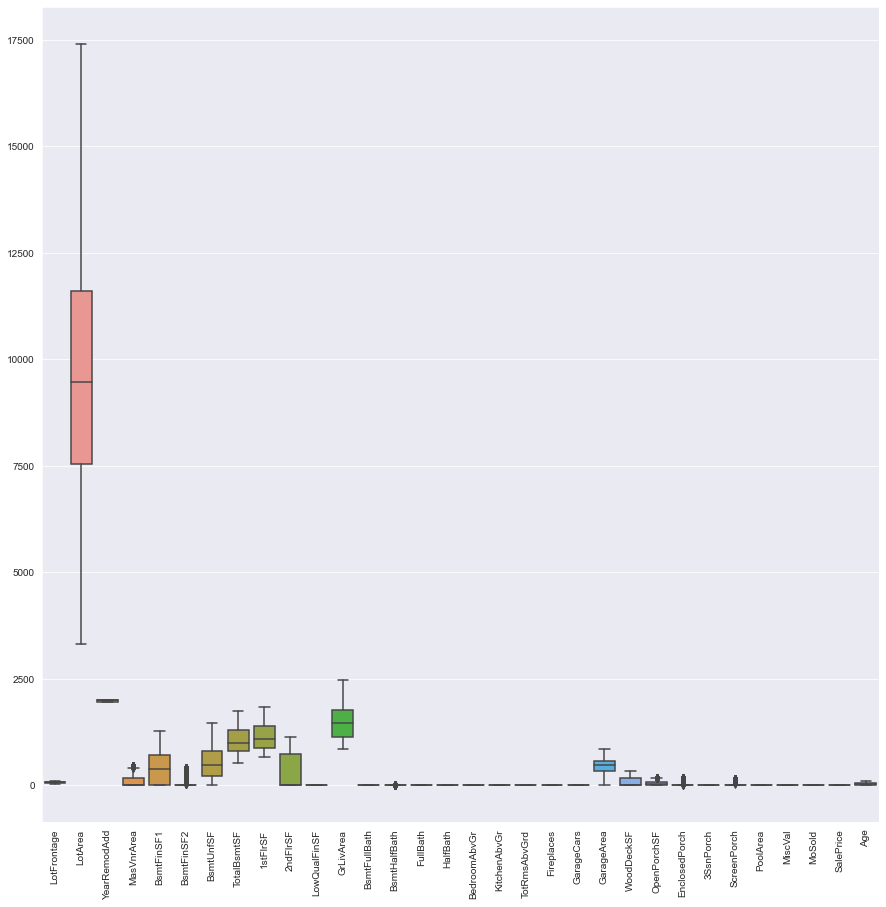

In [130]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [132]:
df_clean = pd.concat([df_num, df_cat_encoded], axis=1)

In [133]:
df_clean.shape

(1460, 385)

In [48]:
sns.boxplot(df['LotFrontage'])


<Axes: >

In [47]:
sns.boxplot(df['LotArea'])

<Axes: >

In [134]:
X = df_clean.copy()
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0           0.00          0            0         0        0       2   
1           0.00          0            0         0        0       5   
2           0.00          0            0         0        0       9   
3         180.15          0            0         0        0       2   
4           0.00          0            0         0        0      11   

   SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0  12.247694    5              0              0              0              0   
1  12.109011   31              0              0              0              0   
2  12.317167    7              0              0              0              0   
3  11.849398   91              0              0              0              0   
4  12.429216    8              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0 

In [137]:
X = X.drop(columns=['SalePrice'])

In [139]:
X.isnull().sum()

LotFrontage              0
LotArea                  0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
Age                      0
MSSubClass_30            0
MSSubClass_40            0
MSSubClass_45            0
MSSubClass_50            0
MSSubClass_60            0
MSSubClass_70            0
M

In [140]:
X.shape

(1460, 384)

In [141]:
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            

 > Our X for training 🥳

In [169]:
y = df["SalePrice"].copy()


<Axes: xlabel='SalePrice'>

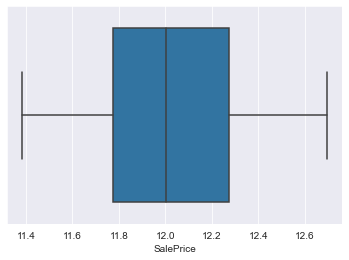

In [168]:
sns.boxplot(x= df["SalePrice"])


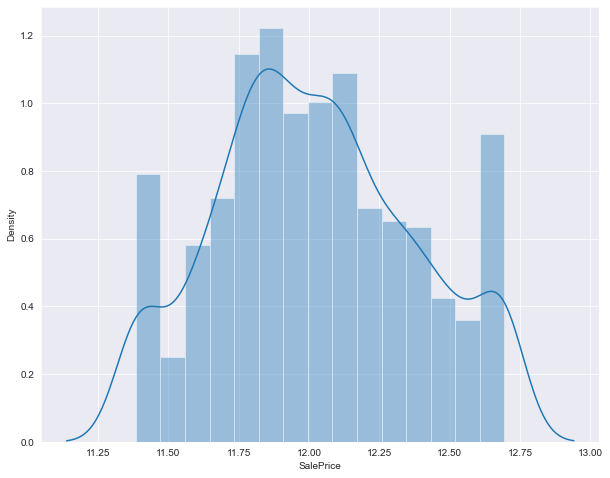

In [167]:
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

In [170]:
y.shape

(1460,)

>y train

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [172]:

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1168, 384)
(1168,)
(292, 384)
(292,)


> We should scale our feature (numerical) 
>Feature Scaling Stnd scaling


In [173]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [174]:
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [175]:
X_train.shape

(1168, 384)

In [176]:
X_test.shape

(292, 384)

In [177]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

### Selected 
Ridge Regression model

In [178]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [179]:
ridgeCV.best_params_

{'alpha': 10.0}

> Best Lamda = 10 for Ridge

In [180]:
ridge = Ridge(alpha=10)
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [181]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)


In [182]:

ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [185]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.048471      0.006199         0.012766        0.003699      0.0001   
1        0.076794      0.021923         0.016955        0.004548       0.001   
2        0.075598      0.006288         0.017154        0.003535        0.01   
3        0.075131      0.005126         0.015559        0.003969        0.05   
4        0.073004      0.002706         0.014163        0.001466         0.1   
5        0.081182      0.007714         0.014960        0.002360         0.2   
6        0.070006      0.004343         0.014022        0.001063         0.3   
7        0.068157      0.002072         0.014162        0.002309         0.4   
8        0.066964      0.003623         0.013963        0.002274         0.5   
9        0.066224      0.004019         0.016756        0.005218         0.6   
10       0.064029      0.001596         0.012367        0.000489         0.7   
11       0.060640      0.004650         0.012360        0.001010         0.8   
12       0.057903      0.001274         0.011883        0.001025         0.9   
13       0.054397      0.001933         0.010173        0.001935         1.0   
14       0.051261      0.001739         0.009973        0.001411         2.0   
15       0.049668      0.002310         0.008977        0.001669         3.0   
16       0.051262      0.001354         0.011370        0.000488         4.0   
17       0.052261      0.003431         0.010171        0.001163         5.0   
18       0.051065      0.004251         0.009973        0.002092         6.0   
19       0.057247      0.002569         0.012566        0.000488         7.0   
20       0.056244      0.001494         0.010771        0.002034         8.0   
21       0.053657      0.004009         0.010571        0.001494         9.0   
22       0.050465      0.002862         0.011369        0.001197        10.0   
23       0.049268      0.005337         0.010372        0.000798          20   
24       0.053855      0.002821         0.011171        0.001323          50   
25       0.054656      0.001715         0.010571        0.002051         100   
26       0.053857      0.003455         0.009177        0.001715         500   
27       0.039694      0.005478         0.005785        0.000746        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.081673          -0.101828   
1    {'alpha': 0.001}          -0.081586          -0.100936   
2     {'alpha': 0.01}          -0.080603          -0.098118   
3     {'alpha': 0.05}          -0.080104          -0.094781   
4      {'alpha': 0.1}          -0.079578          -0.092349   
5      {'alpha': 0.2}          -0.078602          -0.089576   
6      {'alpha': 0.3}          -0.077658          -0.087865   
7      {'alpha': 0.4}          -0.076766          -0.086746   
8      {'alpha': 0.5}          -0.075957          -0.085866   
9      {'alpha': 0.6}          -0.075217          -0.085126   
10     {'alpha': 0.7}          -0.074599          -0.084513   
11     {'alpha': 0.8}          -0.074151          -0.084037   
12     {'alpha': 0.9}          -0.073747          -0.083640   
13     {'alpha': 1.0}          -0.073381          -0.083293   
14     {'alpha': 2.0}          -0.070959          -0.081103   
15     {'alpha': 3.0}          -0.069506          -0.080140   
16     {'alpha': 4.0}          -0.068657          -0.079670   
17     {'alpha': 5.0}          -0.068032          -0.079504   
18     {'alpha': 6.0}          -0.067567          -0.079530   
19     {'alpha': 7.0}          -0.067257          -0.079612   
20     {'alpha': 8.0}          -0.067030          -0.079713   
21     {'alpha': 9.0}          -0.066859          -0.079824   
22    {'alpha': 10.0}          -0.066765          -0.079957   
23      {'alpha': 20}          -0.067106          -0.081396   
24      {'alpha': 50}          -0.070718          -0.085138   
25     {'alpha': 100}          -0.074230     

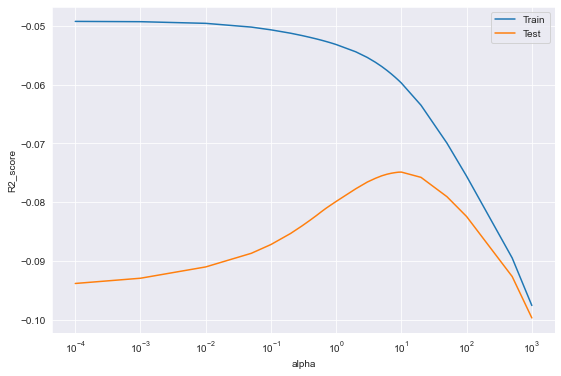

In [188]:
## Plotting R2 score vs alpha values
plt.figure(figsize=[9,6])
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()


### Lasso Regression

In [190]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
lassoCV.best_params_


{'alpha': 0.001}

In [195]:
lassoCV.cv_results_


{'mean_fit_time': array([0.65351834, 0.23796659, 0.14282241, 0.11708932, 0.08976254,
        0.06243138, 0.05924315, 0.05305715, 0.05345831, 0.05184917,
        0.04450936, 0.04508801, 0.04188824, 0.04321437, 0.04124165,
        0.04055471, 0.03909492, 0.04228702, 0.04168835, 0.03909645,
        0.0396934 , 0.04208775, 0.03869619, 0.03331037, 0.03929486,
        0.0400928 , 0.04033799, 0.02907681]),
 'std_fit_time': array([0.07473644, 0.07389025, 0.01971838, 0.0148014 , 0.00356871,
        0.00720999, 0.0124332 , 0.00452271, 0.00698465, 0.00443246,
        0.0032157 , 0.00656961, 0.00315403, 0.00273056, 0.00410725,
        0.00246144, 0.00182743, 0.00135334, 0.00132344, 0.00230988,
        0.00146514, 0.00116312, 0.00116383, 0.00457456, 0.0016197 ,
        0.0030522 , 0.00196854, 0.00183704]),
 'mean_score_time': array([0.01297655, 0.02054548, 0.02792301, 0.02513156, 0.02034492,
        0.01755223, 0.01755214, 0.01934881, 0.01735315, 0.01681118,
        0.01276617, 0.01216707, 0.012367

In [200]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.653518      0.074736         0.012977        0.001083      0.0001   
1        0.237967      0.073890         0.020545        0.004989       0.001   
2        0.142822      0.019718         0.027923        0.004371        0.01   
3        0.117089      0.014801         0.025132        0.004389        0.05   
4        0.089763      0.003569         0.020345        0.002572         0.1   
5        0.062431      0.007210         0.017552        0.001353         0.2   
6        0.059243      0.012433         0.017552        0.002792         0.3   
7        0.053057      0.004523         0.019349        0.004617         0.4   
8        0.053458      0.006985         0.017353        0.001353         0.5   
9        0.051849      0.004432         0.016811        0.003914         0.6   
10       0.044509      0.003216         0.012766        0.001323         0.7   
11       0.045088      0.006570         0.012167        0.000746         0.8   
12       0.041888      0.003154         0.012368        0.000798         0.9   
13       0.043214      0.002731         0.012852        0.000907         1.0   
14       0.041242      0.004107         0.011776        0.001152         2.0   
15       0.040555      0.002461         0.012966        0.002092         3.0   
16       0.039095      0.001827         0.012765        0.000747         4.0   
17       0.042287      0.001353         0.012766        0.000977         5.0   
18       0.041688      0.001323         0.012368        0.000797         6.0   
19       0.039096      0.002310         0.011169        0.001714         7.0   
20       0.039693      0.001465         0.013364        0.001017         8.0   
21       0.042088      0.001163         0.012367        0.000488         9.0   
22       0.038696      0.001164         0.010572        0.001352        10.0   
23       0.033310      0.004575         0.009774        0.001595          20   
24       0.039295      0.001620         0.012168        0.000747          50   
25       0.040093      0.003052         0.012376        0.000481         100   
26       0.040338      0.001969         0.010234        0.001304         500   
27       0.029077      0.001837         0.007591        0.001834        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.069359          -0.081482   
1    {'alpha': 0.001}          -0.068861          -0.081934   
2     {'alpha': 0.01}          -0.091298          -0.110751   
3     {'alpha': 0.05}          -0.109268          -0.132709   
4      {'alpha': 0.1}          -0.144592          -0.168175   
5      {'alpha': 0.2}          -0.239648          -0.251524   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

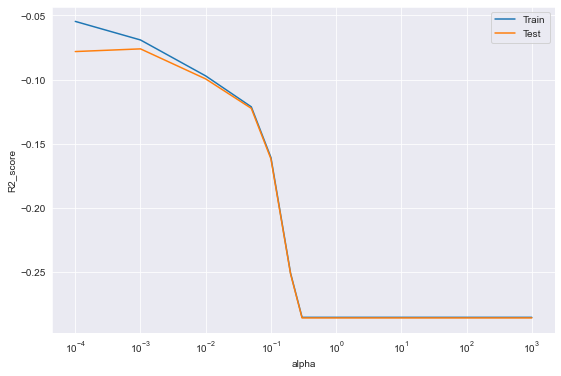

In [202]:
## Plotting R2 score vs alpha values
plt.figure(figsize=[9,6])
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()


In [203]:
lasso = Lasso(alpha=0.001)
# Fit the model on training data
lasso.fit(X_train, y_train)
Lasso(alpha=0.001)
## View the coefficients of lasso fitted model
lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [204]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [205]:
pd.options.display.float_format = "{:,.2f}".format
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.92
R2 Score (Test)               0.93              0.93
RSS (Train)                   8.53             11.29
RSS (Test)                    2.87              2.92
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.10
RMSE (Test)                   0.10              0.10

In [208]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [210]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
## View the betas/coefficients
betas 

Ridge  Lasso
LotFrontage             0.01   0.00
LotArea                 0.02   0.02
YearRemodAdd            0.02   0.03
MasVnrArea             -0.00  -0.00
BsmtFinSF1              0.01   0.03
BsmtFinSF2             -0.00   0.00
BsmtUnfSF              -0.01  -0.00
TotalBsmtSF             0.05   0.04
1stFlrSF                0.01  -0.00
2ndFlrSF                0.03   0.01
LowQualFinSF            0.00   0.00
GrLivArea               0.09   0.11
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00   0.00
FullBath                0.01   0.01
HalfBath                0.01   0.01
BedroomAbvGr            0.00   0.00
KitchenAbvGr            0.00   0.00
TotRmsAbvGrd           -0.00  -0.00
Fireplaces              0.02   0.02
GarageCars              0.02   0.02
GarageArea              0.02   0.02
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.01   0.01
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                 -0.00  -0.00
Age                    -0.05  -0.05
MSSubClass_30          -0.04  -0.00
MSSubClass_40           0.01   0.00
MSSubClass_45           0.00   0.00
MSSubClass_50          -0.00   0.00
MSSubClass_60          -0.01  -0.00
MSSubClass_70           0.04   0.03
MSSubClass_75           0.03   0.00
MSSubClass_80           0.00   0.00
MSSubClass_85           0.00   0.00
MSSubClass_90          -0.03  -0.02
MSSubClass_120          0.01   0.00
MSSubClass_160         -0.05  -0.04
MSSubClass_180         -0.01  -0.00
MSSubClass_190         -0.02  -0.00
MSZoning_FV             0.04   0.00
MSZoning_RH             0.01   0.00
MSZoning_RL             0.01   0.00
MSZoning_RM            -0.02  -0.04
Street_Pave            -0.01  -0.00
Alley_None             -0.01  -0.00
Alley_Pave              0.02   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.02  -0.00
LotShape_Reg            0.00  -0.00
LandContour_HLS         0.03   0.00
LandContour_Low         0.01   0.00
LandContour_Lvl         0.02  -0.00
Utilities_NoSeWa       -0.01  -0.00
LotConfig_CulDSac       0.03   0.02
LotConfig_FR2          -0.02  -0.00
LotConfig_FR3          -0.00  -0.00
LotConfig_Inside       -0.00   0.00
LandSlope_Mod          -0.00   0.00
LandSlope_Sev           0.03   0.00
Neighborhood_Blueste   -0.00  -0.00
Neighborhood_BrDale    -0.00  -0.00
Neighborhood_BrkSide    0.03   0.03
Neighborhood_ClearCr    0.03   0.00
Neighborhood_CollgCr   -0.02  -0.00
Neighborhood_Crawfor    0.08   0.09
Neighborhood_Edwards   -0.05  -0.03
Neighborhood_Gilbert   -0.01  -0.00
Neighborhood_IDOTRR     0.00   0.00
Neighborhood_MeadowV   -0.07  -0.03
Neighborhood_Mitchel   -0.03  -0.00
Neighborhood_NAmes     -0.03  -0.00
Neighborhood_NPkVill    0.01   0.00
Neighborhood_NWAmes    -0.02  -0.00
Neighborhood_NoRidge    0.01   0.00
Neighborhood_NridgHt    0.04   0.02
Neighborhood_OldTown   -0.02  -0.00
Neighborhood_SWISU      0.01   0.00
Neighborhood_Sawyer    -0.02  -0.00
Neighborhood_SawyerW   -0.02  -0.00
Neighborhood_Somerst    0.03   0.04
Neighborhood_StoneBr    0.05   0.01
Neighborhood_Timber     0.01   0.00
Neighborhood_Veenker    0.02   0.00
Condition1_Feedr       -0.00  -0.00
Condition1_Norm         0.04   0.04
Condition1_PosA         0.01   0.00
Condition1_PosN         0.02   0.00
Condition1_RRAe        -0.03  -0.00
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00   0.00
Condition1_RRNn         0.02   0.00
Condition2_Feedr       -0.00  -0.00
Condition2_Norm         0.03   0.00
Condition2_PosA         0.03   0.00
Condition2_PosN        -0.03  -0.00
Condition2_RRAe        -0.00  -0.00
Condition2_RRAn        -0.01  -0.00
Condition2_RRNn         0.01   0.00
BldgType_2fmCon        -0.02  -0.00
BldgType_Duplex        -0.03  -0.03
BldgType_Twnhs         -0.04  -0.01
BldgType_TwnhsE        -0.02  -0.00
HouseStyle_1.5Unf       0.00   0.00
HouseStyle_1Story       0.02  -0.00
HouseStyle_2.5Fin       0.0

## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
>> this is a better way for understand thr true relation

In [211]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.08
OverallQual_8          1.08
Neighborhood_Crawfor   1.08
OverallCond_9          1.08
Functional_Typ         1.07
Exterior1st_BrkFace    1.07
SaleCondition_Alloca   1.07
CentralAir_Y           1.06
TotalBsmtSF            1.05
Name: Ridge, dtype: float64

In [212]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.13
GrLivArea              1.11
OverallQual_8          1.11
Neighborhood_Crawfor   1.09
Exterior1st_BrkFace    1.08
Functional_Typ         1.08
CentralAir_Y           1.05
Neighborhood_Somerst   1.04
TotalBsmtSF            1.04
Condition1_Norm        1.04
Name: Lasso, dtype: float64

### The variables significant in predicting the price of a house are: -
GrLivArea, OverallQual_9, OverallCond_9, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, Exterior1st_BrkFace, SaleCondition_Alloca, CentralAir_Y, TotalBsmtSF, Neighborhood_Somerst, TotalBsmtSF and Condition1_Norm

>>How well those variables describe the price of a house?
Here will see only top few variables

GrLivArea:an increase of 1 square foot of house area above ground, the price will increase by 1.09 to 1.11 times
OverallQual_9 & OverallQual_8: if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.08 to 1.13 times
Neighborhood_Crawfor: if Crawford is a nearby location, then the price of house will increase by 1.07 to 1.09 times
Functional_Typ: if the home functionality is typical, then the price of house will increase by 1.07 to 1.08 times
Exterior1st_BrkFace: if the exterior covering on the house is Brick Face, the price of house will increase by 1.07 to 1.08 times.
In a similar manner, we can deduct how well each variable describes the price of a house.